# 1. Th∆∞ vi·ªán

## 1.1. Khai b√°o c√°c th∆∞ vi·ªán

In [20]:
# Import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import seaborn as sns
import joblib
import time

import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split

import xgboost
from xgboost import XGBRegressor

## 1.2. Ki·ªÉm tra phi√™n b·∫£n c√°c th∆∞ vi·ªán

In [21]:
# Th√¥ng tin phi√™n b·∫£n c√°c th∆∞ vi·ªán Python
print('Phi√™n b·∫£n Python: {}'.format(sys.version))
print('Phi√™n b·∫£n Numpy: {}'.format(np.__version__))
print('Phi√™n b·∫£n Pandas: {}'.format(pd.__version__))
print('Phi√™n b·∫£n Matplotlib: {}'.format(matplotlib.__version__))
print('Phi√™n b·∫£n Seaborn: {}'.format(sns.__version__))
print('Phi√™n b·∫£n Sci-Kit Learn: {}'.format(sklearn.__version__))
print('Phi√™n b·∫£n XGBoost: {}'.format(xgboost.__version__))

Phi√™n b·∫£n Python: 3.13.5 (tags/v3.13.5:6cb20a2, Jun 11 2025, 16:15:46) [MSC v.1943 64 bit (AMD64)]
Phi√™n b·∫£n Numpy: 2.3.1
Phi√™n b·∫£n Pandas: 2.3.0
Phi√™n b·∫£n Matplotlib: 3.10.3
Phi√™n b·∫£n Seaborn: 0.13.2
Phi√™n b·∫£n Sci-Kit Learn: 1.7.0
Phi√™n b·∫£n XGBoost: 3.0.2


# 2. Thu th·∫≠p v√† x·ª≠ l√Ω d·ªØ li·ªáu

## 2.1 L·∫•y d·ªØ li·ªáu

### 2.1.1 D·ªØ li·ªáu t·ª´ file

#### 2.1.1.1 Drive

In [22]:
# from google.colab import drive

# # K·∫øt n·ªëi Google Drive
# drive.mount('/content/drive')

# # ƒê·∫∑t ƒë∆∞·ªùng d·∫´n t·ªõi th∆∞ m·ª•c ch·ª©a d·ªØ li·ªáu
# data_path = '/content/drive/MyDrive/MHUD/Project/Datasets'

# # ƒê·ªçc file CSV t·ª´ Google Drive nh∆∞ ƒë·ªçc local
# eu = pd.read_csv(f'{data_path}/EURUSD-2000-2020-15m.csv', skipinitialspace=True)

# # Chu·∫©n h√≥a c·ªôt
# eu.columns = [x.lower() for x in eu.columns]

# # Chuy·ªÉn ƒë·ªïi c·ªôt th·ªùi gian
# eu["date_time"] = pd.to_datetime(eu["date_time"], format='%Y.%m.%d %H:%M:%S')
# eu.set_index('date_time', inplace=True)

# # Hi·ªÉn th·ªã 5 d√≤ng ƒë·∫ßu ti√™n
# eu.head(5)


#### 2.1.1.2 Local

In [23]:
eu = pd.read_csv('./EURUSD-2000-2020-15m.csv', skipinitialspace=True)
eu.columns = [x.lower() for x in eu.columns]
eu["date_time"] = pd.to_datetime(eu["date_time"], format='%Y.%m.%d %H:%M:%S')
eu.set_index('date_time', inplace=True)
eu.head(5)

high     low    open   close
date_time                                          
2000-01-03 00:00:00  1.0080  1.0073  1.0073  1.0077
2000-01-03 00:15:00  1.0087  1.0076  1.0078  1.0086
2000-01-03 00:30:00  1.0089  1.0079  1.0087  1.0079
2000-01-03 00:45:00  1.0132  1.0078  1.0078  1.0128
2000-01-03 01:00:00  1.0133  1.0120  1.0129  1.0122

### 2.1.2 Tr·ª±c quan h√≥a d·ªØ li·ªáu

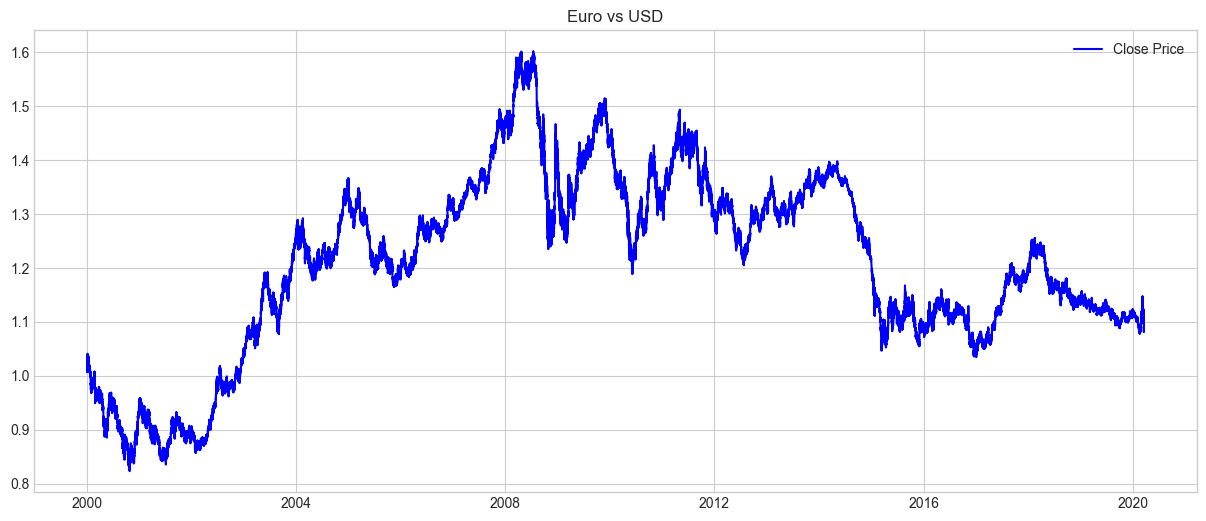

<Axes: >

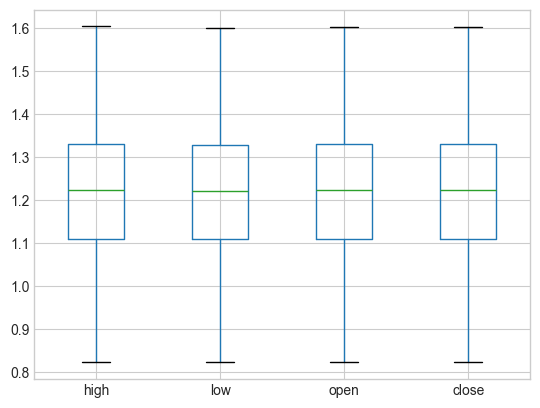

In [24]:
plt.figure(figsize=(15,6))
plt.plot(eu.close, label='Close Price', color='blue')
plt.title('Euro vs USD')
plt.legend()
plt.show()

# Bi·ªÉu ƒë·ªì box plot cho open, high, low, close
eu.boxplot()

### 2.1.3 T·∫°o c√°c ƒë·∫∑c tr∆∞ng m·ªõi

In [25]:
def generate_features(df):
    """ T·∫°o c√°c ƒë·∫∑c tr∆∞ng cho c·ªï phi·∫øu/ch·ªâ s·ªë/ti·ªÅn t·ªá/h√†ng h√≥a d·ª±a tr√™n gi√° l·ªãch s·ª≠ v√† hi·ªáu su·∫•t
    Args:
        df (dataframe v·ªõi c√°c c·ªôt "open", "close", "high", "low")
    Returns:
        dataframe, t·∫≠p d·ªØ li·ªáu v·ªõi c√°c ƒë·∫∑c tr∆∞ng m·ªõi
    """
    df_new = pd.DataFrame()

    # 6 ƒë·∫∑c tr∆∞ng g·ªëc
    df_new['open'] = df['open']
    df_new['open_1'] = df['open'].shift(1)
    df_new['close_1'] = df['close'].shift(1)
    df_new['high_1'] = df['high'].shift(1)
    df_new['low_1'] = df['low'].shift(1)

    # 50 ƒë·∫∑c tr∆∞ng g·ªëc
    # gi√° trung b√¨nh
    df_new['avg_price_5'] = df['close'].rolling(window=5).mean().shift(1)
    df_new['avg_price_30'] = df['close'].rolling(window=21).mean().shift(1)
    df_new['avg_price_90'] = df['close'].rolling(window=63).mean().shift(1)
    df_new['avg_price_365'] = df['close'].rolling(window=252).mean().shift(1)

    # t·ª∑ l·ªá gi√° trung b√¨nh
    df_new['ratio_avg_price_5_30'] = df_new['avg_price_5'] / df_new['avg_price_30']
    df_new['ratio_avg_price_905_'] = df_new['avg_price_5'] / df_new['avg_price_90']
    df_new['ratio_avg_price_5_365'] = df_new['avg_price_5'] / df_new['avg_price_365']
    df_new['ratio_avg_price_30_90'] = df_new['avg_price_30'] / df_new['avg_price_90']
    df_new['ratio_avg_price_30_365'] = df_new['avg_price_30'] / df_new['avg_price_365']
    df_new['ratio_avg_price_90_365'] = df_new['avg_price_90'] / df_new['avg_price_365']

    # ƒë·ªô l·ªách chu·∫©n c·ªßa gi√°
    df_new['std_price_5'] = df['close'].rolling(window=5).std().shift(1)
    df_new['std_price_30'] = df['close'].rolling(window=21).std().shift(1)
    df_new['std_price_90'] = df['close'].rolling(window=63).std().shift(1)
    df_new['std_price_365'] = df['close'].rolling(window=252).std().shift(1)

    # t·ª∑ l·ªá ƒë·ªô l·ªách chu·∫©n c·ªßa gi√°
    df_new['ratio_std_price_5_30'] = df_new['std_price_5'] / df_new['std_price_30']
    df_new['ratio_std_price_5_90'] = df_new['std_price_5'] / df_new['std_price_90']
    df_new['ratio_std_price_5_365'] = df_new['std_price_5'] / df_new['std_price_365']
    df_new['ratio_std_price_30_90'] = df_new['std_price_30'] / df_new['std_price_90']
    df_new['ratio_std_price_30_365'] = df_new['std_price_30'] / df_new['std_price_365']
    df_new['ratio_std_price_90_365'] = df_new['std_price_90'] / df_new['std_price_365']

    # l·ª£i nhu·∫≠n
    df_new['return_1'] = ((df['close'] - df['close'].shift(1)) / df['close'].shift(1)).shift(1)
    df_new['return_5'] = ((df['close'] - df['close'].shift(5)) / df['close'].shift(5)).shift(1)
    df_new['return_30'] = ((df['close'] - df['close'].shift(21)) / df['close'].shift(21)).shift(1)
    df_new['return_90'] = ((df['close'] - df['close'].shift(63)) / df['close'].shift(63)).shift(1)
    df_new['return_365'] = ((df['close'] - df['close'].shift(252)) / df['close'].shift(252)).shift(1)

    # trung b√¨nh l·ª£i nhu·∫≠n
    df_new['moving_avg_5'] = df_new['return_1'].rolling(window=5).mean()
    df_new['moving_avg_30'] = df_new['return_1'].rolling(window=21).mean()
    df_new['moving_avg_30'] = df_new['return_1'].rolling(window=63).mean()
    df_new['moving_avg_365'] = df_new['return_1'].rolling(window=252).mean()

    # RSI (Relative Strength Index)
    for n in [7, 14, 21]:
        delta = df['close'].diff()
        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)

        avg_gain = gain.rolling(window=n).mean().shift(1)
        avg_loss = loss.rolling(window=n).mean().shift(1)

        rs = avg_gain / avg_loss
        df_new[f'rsi_{n}'] = 100 - (100 / (1 + rs))

    # Stochastic Oscillator
    for n in [5, 14, 21]:
        low_n = df['low'].rolling(window=n).min().shift(1)
        high_n = df['high'].rolling(window=n).max().shift(1)

        # %K
        df_new[f'stoch_k_{n}'] = 100 * ((df['close'].shift(1) - low_n) / (high_n - low_n))
        # %D (Trung b√¨nh ƒë·ªông ƒë∆°n gi·∫£n c·ªßa %K)
        df_new[f'stoch_d_{n}'] = df_new[f'stoch_k_{n}'].rolling(window=3).mean()

    # Bollinger Bands
    for n in [10, 20, 50]:
        # Middle Band
        middle_band = df['close'].rolling(window=n).mean().shift(1)
        # Standard Deviation
        std_dev = df['close'].rolling(window=n).std().shift(1)

        # Upper and Lower Bands
        df_new[f'bollinger_upper_{n}'] = middle_band + (std_dev * 2)
        df_new[f'bollinger_lower_{n}'] = middle_band - (std_dev * 2)

    # MACD
    # C·∫•u h√¨nh chu·∫©n (12, 26)
    ema_fast = df['close'].ewm(span=12, adjust=False).mean()
    ema_slow = df['close'].ewm(span=26, adjust=False).mean()
    df_new['macd_12_26'] = (ema_fast - ema_slow).shift(1)
    df_new['macd_signal_12_26'] = df_new['macd_12_26'].ewm(span=9, adjust=False).mean()

    # C·∫•u h√¨nh thay th·∫ø (5, 35)
    ema_fast_alt = df['close'].ewm(span=5, adjust=False).mean()
    ema_slow_alt = df['close'].ewm(span=35, adjust=False).mean()
    df_new['macd_5_35'] = (ema_fast_alt - ema_slow_alt).shift(1)
    df_new['macd_signal_5_35'] = df_new['macd_5_35'].ewm(span=5, adjust=False).mean()

    # bi·∫øn m·ª•c ti√™u
    df_new['close'] = df['close']
    df_new = df_new.dropna(axis=0)
    return df_new

data = generate_features(eu)

### 2.1.4 Ki·ªÉm tra d·ªØ li·ªáu ƒë√£ s·ª≠ l√Ω

C√°c th√¥ng tin c∆° b·∫£n c·ªßa d·ªØ li·ªáu

In [26]:
print(f"K√≠ch th∆∞·ªõc d·ªØ li·ªáu: {data.shape}")
print(f"Kho·∫£ng th·ªùi gian: {data.index.min()} ƒë·∫øn {data.index.max()}")
print(f"C√°c features: {list(data.columns)}")

data.info()

K√≠ch th∆∞·ªõc d·ªØ li·ªáu: (500496, 53)
Kho·∫£ng th·ªùi gian: 2000-01-05 15:45:00 ƒë·∫øn 2020-03-19 06:00:00
C√°c features: ['open', 'open_1', 'close_1', 'high_1', 'low_1', 'avg_price_5', 'avg_price_30', 'avg_price_90', 'avg_price_365', 'ratio_avg_price_5_30', 'ratio_avg_price_905_', 'ratio_avg_price_5_365', 'ratio_avg_price_30_90', 'ratio_avg_price_30_365', 'ratio_avg_price_90_365', 'std_price_5', 'std_price_30', 'std_price_90', 'std_price_365', 'ratio_std_price_5_30', 'ratio_std_price_5_90', 'ratio_std_price_5_365', 'ratio_std_price_30_90', 'ratio_std_price_30_365', 'ratio_std_price_90_365', 'return_1', 'return_5', 'return_30', 'return_90', 'return_365', 'moving_avg_5', 'moving_avg_30', 'moving_avg_365', 'rsi_7', 'rsi_14', 'rsi_21', 'stoch_k_5', 'stoch_d_5', 'stoch_k_14', 'stoch_d_14', 'stoch_k_21', 'stoch_d_21', 'bollinger_upper_10', 'bollinger_lower_10', 'bollinger_upper_20', 'bollinger_lower_20', 'bollinger_upper_50', 'bollinger_lower_50', 'macd_12_26', 'macd_signal_12_26', 'macd

Ma tr·∫≠n heat map c·ªßa t·∫≠p d·ªØ li·ªáu


Bi·ªÉu ƒë·ªì nhi·ªát



<Axes: >

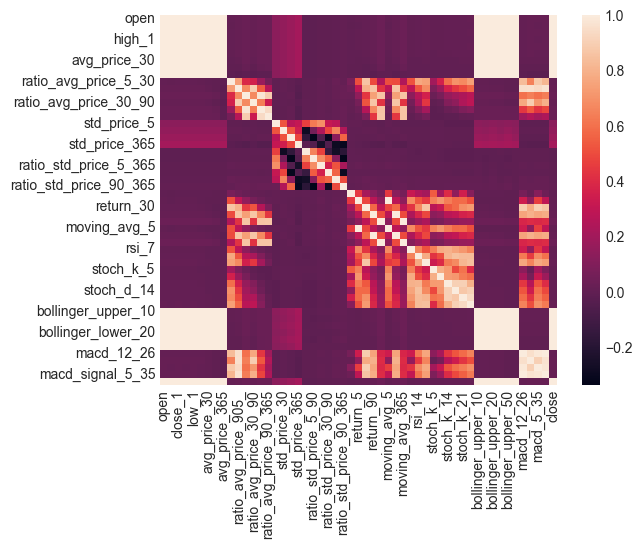

In [27]:
data.head()

data.describe()
print("\nBi·ªÉu ƒë·ªì nhi·ªát\n")
sns.heatmap(data.corr())

## 2.2 Chia d·ªØ li·ªáu

### 2.2.1 Hold-out

In [28]:
# import th∆∞ vi·ªán datetime
import datetime

# ph√¢n chia d·ªØ li·ªáu cho training
start_train = datetime.datetime(2000, 1, 1,0,0)
end_train = datetime.datetime(2018, 12, 31, 0, 0)
data_train = data.loc[start_train:end_train]
data_train.describe()


# ph√¢n chia d·ªØ li·ªáu cho testing
start_test = datetime.datetime(2019, 1, 1, 0, 0)
data_test = data.loc[start_test:]
data_test.describe()

open        open_1       close_1        high_1         low_1  \
count  30053.000000  30053.000000  30053.000000  30053.000000  30053.000000   
mean       1.116983      1.116985      1.116983      1.117242      1.116720   
std        0.014744      0.014744      0.014744      0.014767      0.014723   
min        1.078360      1.078360      1.078390      1.078500      1.077780   
25%        1.106910      1.106920      1.106910      1.107190      1.106670   
50%        1.116420      1.116420      1.116410      1.116640      1.116150   
75%        1.127890      1.127890      1.127890      1.128150      1.127630   
max        1.156910      1.156910      1.156910      1.156970      1.156440   

        avg_price_5  avg_price_30  avg_price_90  avg_price_365  \
count  30053.000000  30053.000000  30053.000000   30053.000000   
mean       1.116987      1.117001      1.117039       1.117179   
std        0.014739      0.014724      0.014685       0.014557   
min        1.078474      1.078739      1.079089       1.079644   
25%        1.106944      1.106933      1.106939       1.106912   
50%        1.116400      1.116313      1.116134       1.116486   
75%        1.127876      1.127883      1.127999       1.128148   
max        1.156522      1.155808      1.154907       1.151470   

       ratio_avg_price_5_30  ...  bollinger_lower_10  bollinger_upper_20  \
count          30053.000000  ...        30053.000000        30053.000000   
mean               0.999987  ...            1.116163            1.118161   
std                0.000752  ...            0.014687            0.014856   
min                0.992224  ...            1.077641            1.079101   
25%                0.999702  ...            1.106215            1.107896   
50%                1.000003  ...            1.115559            1.117621   
75%                1.000280  ...            1.127089            1.129021   
max                1.005555  ...            1.155294            1.157116   

       bollinger_lower_20  bollinger_upper_50  bollinger_lower_50  \
count        30053.000000        30053.000000        30053.000000   
mean             1.115839            1.118889            1.115165   
std              0.014669            0.014915            0.014635   
min              1.077174            1.079544            1.076668   
25%              1.105815            1.108477            1.105191   
50%              1.115236            1.118304            1.114604   
75%              1.126773            1.129876            1.125812   
max              1.154785            1.159111            1.153916   

         macd_12_26  macd_signal_12_26     macd_5_35  macd_signal_5_35  \
count  30053.000000       30053.000000  30053.000000      30053.000000   
mean      -0.000013          -0.000012     -0.000027         -0.000027   
std        0.000463           0.000435      0.000969          0.000936   
min       -0.004502          -0.003855     -0.010116         -0.009146   
25%       -0.000204          -0.000196     -0.000430         -0.000422   
50%       -0.000005          -0.000005     -0.000017         -0.000015   
75%        0.000181           0.000173      0.000377          0.000368   
max        0.002600           0.002206      0.006225          0.005218   

              close  
count  30053.000000  
mean       1.116981  
std        0.014744  
min        1.078390  
25%        1.106910  
50%        1.116410  
75%        1.127890  
max        1.156910  

[8 rows x 53 columns]

### 2.2.2 Time Series Cross-Validation

Time Series Cross-Validation l√† ph∆∞∆°ng ph√°p chia d·ªØ li·ªáu ph√π h·ª£p v·ªõi d·ªØ li·ªáu chu·ªói th·ªùi gian, ƒë·∫£m b·∫£o kh√¥ng s·ª≠ d·ª•ng d·ªØ li·ªáu t∆∞∆°ng lai ƒë·ªÉ d·ª± ƒëo√°n qu√° kh·ª©.

Time Series Cross-Validation v·ªõi 5 folds:
Fold 1: Train = 83416 m·∫´u, Test = 83416 m·∫´u
  Train: t·ª´ 0 ƒë·∫øn 83415
  Test: t·ª´ 83416 ƒë·∫øn 166831
Fold 2: Train = 166832 m·∫´u, Test = 83416 m·∫´u
  Train: t·ª´ 0 ƒë·∫øn 166831
  Test: t·ª´ 166832 ƒë·∫øn 250247
Fold 3: Train = 250248 m·∫´u, Test = 83416 m·∫´u
  Train: t·ª´ 0 ƒë·∫øn 250247
  Test: t·ª´ 250248 ƒë·∫øn 333663
Fold 4: Train = 333664 m·∫´u, Test = 83416 m·∫´u
  Train: t·ª´ 0 ƒë·∫øn 333663
  Test: t·ª´ 333664 ƒë·∫øn 417079
Fold 5: Train = 417080 m·∫´u, Test = 83416 m·∫´u
  Train: t·ª´ 0 ƒë·∫øn 417079
  Test: t·ª´ 417080 ƒë·∫øn 500495


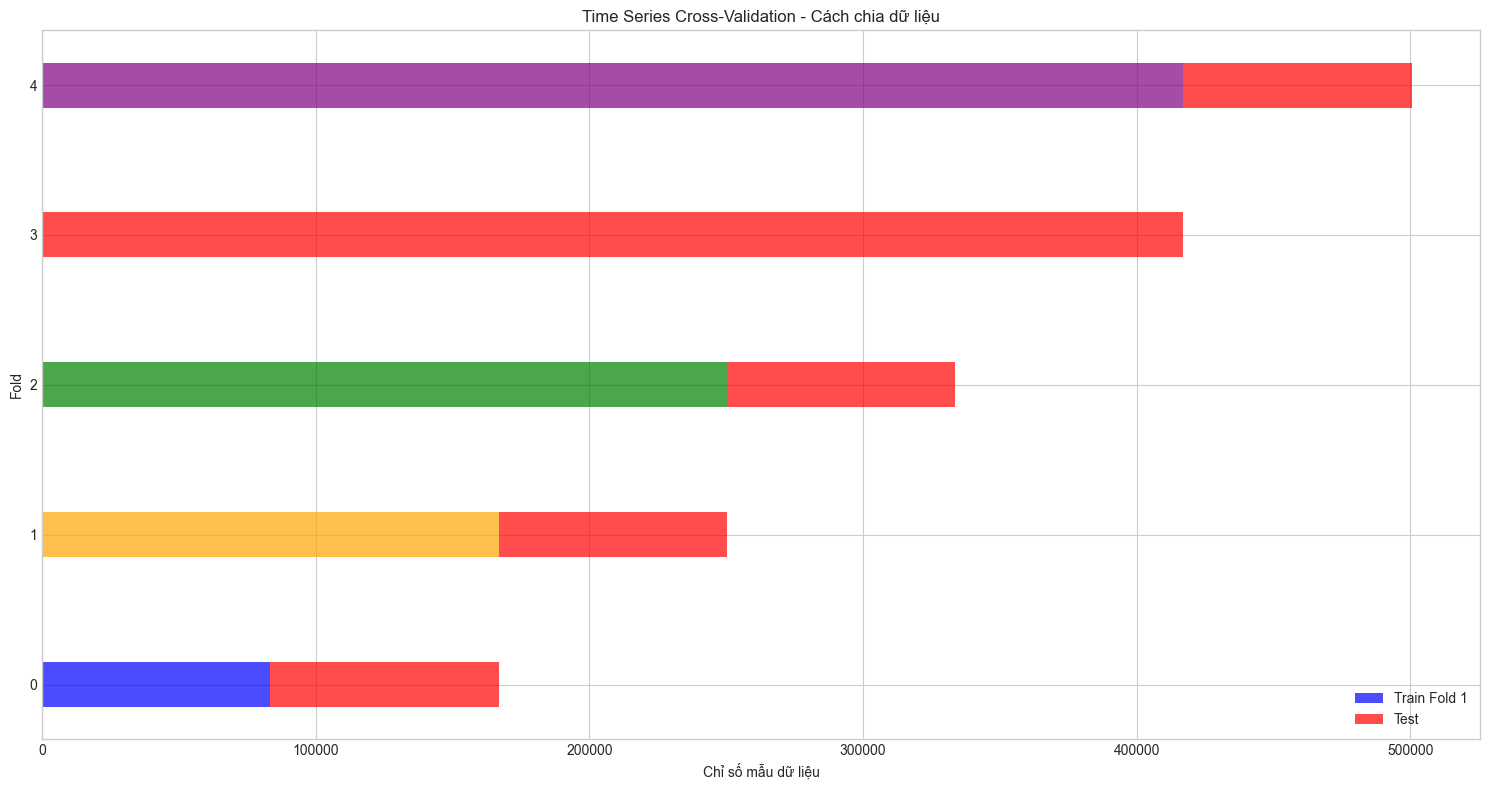


∆Øu ƒëi·ªÉm c·ªßa Time Series CV:
- Kh√¥ng s·ª≠ d·ª•ng d·ªØ li·ªáu t∆∞∆°ng lai ƒë·ªÉ d·ª± ƒëo√°n qu√° kh·ª©
- M√¥ ph·ªèng th·ª±c t·∫ø vi·ªác d·ª± ƒëo√°n theo th·ªùi gian
- ƒê√°nh gi√° ƒë·ªô ·ªïn ƒë·ªãnh c·ªßa m√¥ h√¨nh qua th·ªùi gian


In [29]:
from sklearn.model_selection import TimeSeriesSplit

# Thi·∫øt l·∫≠p Time Series Cross-Validation
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Hi·ªÉn th·ªã c√°ch chia d·ªØ li·ªáu
print(f"Time Series Cross-Validation v·ªõi {n_splits} folds:")
print("="*60)

fig, ax = plt.subplots(figsize=(15, 8))
colors = ['blue', 'orange', 'green', 'red', 'purple']

# L·∫•y d·ªØ li·ªáu ƒë·ªÉ minh h·ªça
X_demo = data.drop('close', axis='columns')
y_demo = data['close']

for fold, (train_idx, test_idx) in enumerate(tscv.split(X_demo)):
    # V·∫Ω train set
    ax.barh(fold, len(train_idx), left=train_idx[0], height=0.3, 
            color=colors[fold], alpha=0.7, label=f'Train Fold {fold+1}' if fold == 0 else "")
    
    # V·∫Ω test set
    ax.barh(fold, len(test_idx), left=test_idx[0], height=0.3, 
            color='red', alpha=0.7, label='Test' if fold == 0 else "")
    
    print(f"Fold {fold+1}: Train = {len(train_idx)} m·∫´u, Test = {len(test_idx)} m·∫´u")
    print(f"  Train: t·ª´ {train_idx[0]} ƒë·∫øn {train_idx[-1]}")
    print(f"  Test: t·ª´ {test_idx[0]} ƒë·∫øn {test_idx[-1]}")

ax.set_xlabel('Ch·ªâ s·ªë m·∫´u d·ªØ li·ªáu')
ax.set_ylabel('Fold')
ax.set_title('Time Series Cross-Validation - C√°ch chia d·ªØ li·ªáu')
ax.legend()
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("∆Øu ƒëi·ªÉm c·ªßa Time Series CV:")
print("- Kh√¥ng s·ª≠ d·ª•ng d·ªØ li·ªáu t∆∞∆°ng lai ƒë·ªÉ d·ª± ƒëo√°n qu√° kh·ª©")
print("- M√¥ ph·ªèng th·ª±c t·∫ø vi·ªác d·ª± ƒëo√°n theo th·ªùi gian")
print("- ƒê√°nh gi√° ƒë·ªô ·ªïn ƒë·ªãnh c·ªßa m√¥ h√¨nh qua th·ªùi gian")


## 2.3 Chu·∫©n h√≥a d·ªØ li·ªáu

### 2.3.1 Chu·∫©n h√≥a d·ªØ li·ªáu cho Holdout

In [30]:
#l·∫•y thu·ªôc t√≠nh close cho train v√† test
X_train = data_train.drop('close', axis='columns')
y_train = data_train['close']

X_test = data_test.drop('close', axis='columns')
y_test = data_test['close']

# chu·∫©n h√≥a scaling
scaler = StandardScaler()

X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

# hi·ªÉn th·ªã l·∫°i d·ªØ li·ªáu
data_test.describe()

open        open_1       close_1        high_1         low_1  \
count  30053.000000  30053.000000  30053.000000  30053.000000  30053.000000   
mean       1.116983      1.116985      1.116983      1.117242      1.116720   
std        0.014744      0.014744      0.014744      0.014767      0.014723   
min        1.078360      1.078360      1.078390      1.078500      1.077780   
25%        1.106910      1.106920      1.106910      1.107190      1.106670   
50%        1.116420      1.116420      1.116410      1.116640      1.116150   
75%        1.127890      1.127890      1.127890      1.128150      1.127630   
max        1.156910      1.156910      1.156910      1.156970      1.156440   

        avg_price_5  avg_price_30  avg_price_90  avg_price_365  \
count  30053.000000  30053.000000  30053.000000   30053.000000   
mean       1.116987      1.117001      1.117039       1.117179   
std        0.014739      0.014724      0.014685       0.014557   
min        1.078474      1.078739      1.079089       1.079644   
25%        1.106944      1.106933      1.106939       1.106912   
50%        1.116400      1.116313      1.116134       1.116486   
75%        1.127876      1.127883      1.127999       1.128148   
max        1.156522      1.155808      1.154907       1.151470   

       ratio_avg_price_5_30  ...  bollinger_lower_10  bollinger_upper_20  \
count          30053.000000  ...        30053.000000        30053.000000   
mean               0.999987  ...            1.116163            1.118161   
std                0.000752  ...            0.014687            0.014856   
min                0.992224  ...            1.077641            1.079101   
25%                0.999702  ...            1.106215            1.107896   
50%                1.000003  ...            1.115559            1.117621   
75%                1.000280  ...            1.127089            1.129021   
max                1.005555  ...            1.155294            1.157116   

       bollinger_lower_20  bollinger_upper_50  bollinger_lower_50  \
count        30053.000000        30053.000000        30053.000000   
mean             1.115839            1.118889            1.115165   
std              0.014669            0.014915            0.014635   
min              1.077174            1.079544            1.076668   
25%              1.105815            1.108477            1.105191   
50%              1.115236            1.118304            1.114604   
75%              1.126773            1.129876            1.125812   
max              1.154785            1.159111            1.153916   

         macd_12_26  macd_signal_12_26     macd_5_35  macd_signal_5_35  \
count  30053.000000       30053.000000  30053.000000      30053.000000   
mean      -0.000013          -0.000012     -0.000027         -0.000027   
std        0.000463           0.000435      0.000969          0.000936   
min       -0.004502          -0.003855     -0.010116         -0.009146   
25%       -0.000204          -0.000196     -0.000430         -0.000422   
50%       -0.000005          -0.000005     -0.000017         -0.000015   
75%        0.000181           0.000173      0.000377          0.000368   
max        0.002600           0.002206      0.006225          0.005218   

              close  
count  30053.000000  
mean       1.116981  
std        0.014744  
min        1.078390  
25%        1.106910  
50%        1.116410  
75%        1.127890  
max        1.156910  

[8 rows x 53 columns]

### 2.3.2 Chu·∫©n h√≥a d·ªØ li·ªáu cho Time Series CV

Trong Time Series Cross-Validation, vi·ªác chu·∫©n h√≥a d·ªØ li·ªáu c·∫ßn ƒë∆∞·ª£c th·ª±c hi·ªán ri√™ng bi·ªát cho t·ª´ng fold ƒë·ªÉ tr√°nh data leakage. M·ªói fold s·∫Ω c√≥ scaler ri√™ng ƒë∆∞·ª£c fit tr√™n training set c·ªßa fold ƒë√≥.

In [31]:
# D·ªØ li·ªáu ƒë·∫ßy ƒë·ªß (to√†n b·ªô dataset)
X_full = data.drop('close', axis='columns')
y_full = data['close']

print(f"üìä Th√¥ng tin d·ªØ li·ªáu ƒë·∫ßy ƒë·ªß:")
print(f"   ‚Ä¢ S·ªë m·∫´u: {X_full.shape[0]:,}")
print(f"   ‚Ä¢ S·ªë features: {X_full.shape[1]}")
print(f"   ‚Ä¢ Kho·∫£ng th·ªùi gian: {X_full.index.min()} ƒë·∫øn {X_full.index.max()}")
print(f"   ‚Ä¢ T·∫ßn su·∫•t: 15 ph√∫t")


üìä Th√¥ng tin d·ªØ li·ªáu ƒë·∫ßy ƒë·ªß:
   ‚Ä¢ S·ªë m·∫´u: 500,496
   ‚Ä¢ S·ªë features: 52
   ‚Ä¢ Kho·∫£ng th·ªùi gian: 2000-01-05 15:45:00 ƒë·∫øn 2020-03-19 06:00:00
   ‚Ä¢ T·∫ßn su·∫•t: 15 ph√∫t


In [32]:
# Minh h·ªça c√°ch chu·∫©n h√≥a trong Time Series CV
def demonstrate_time_series_normalization(X, y, n_splits=5):
    """
    Minh h·ªça c√°ch chu·∫©n h√≥a d·ªØ li·ªáu trong Time Series Cross-Validation
    """
    tscv = TimeSeriesSplit(n_splits=n_splits)
    
    print(f"\nüîß MINH H·ªåA CHU·∫®N H√ìA D·ªÆ LI·ªÜU TRONG TIME SERIES CV")
    print(f"{'='*70}")
    
    normalization_info = []
    
    for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
        # Chia d·ªØ li·ªáu cho fold hi·ªán t·∫°i
        X_train_fold = X.iloc[train_idx]
        X_test_fold = X.iloc[test_idx]
        y_train_fold = y.iloc[train_idx]
        y_test_fold = y.iloc[test_idx]
        
        # T·∫°o scaler ri√™ng cho fold n√†y
        scaler_fold = StandardScaler()
        
        # Fit scaler ch·ªâ tr√™n training data c·ªßa fold
        X_train_scaled = scaler_fold.fit_transform(X_train_fold)
        
        # Transform test data b·∫±ng scaler ƒë√£ fit
        X_test_scaled = scaler_fold.transform(X_test_fold)
        
        # Thu th·∫≠p th√¥ng tin v·ªÅ chu·∫©n h√≥a
        fold_info = {
            'fold': fold + 1,
            'train_size': len(train_idx),
            'test_size': len(test_idx),
            'train_mean': X_train_scaled.mean(),
            'train_std': X_train_scaled.std(),
            'test_mean': X_test_scaled.mean(),
            'test_std': X_test_scaled.std(),
            'scaler_mean': scaler_fold.mean_[0],  # Mean c·ªßa feature ƒë·∫ßu ti√™n
            'scaler_scale': scaler_fold.scale_[0]  # Scale c·ªßa feature ƒë·∫ßu ti√™n
        }
        
        normalization_info.append(fold_info)
        
        print(f"Fold {fold+1}:")
        print(f"  üìà Train: {len(train_idx):,} m·∫´u | Test: {len(test_idx):,} m·∫´u")
        print(f"  üìä Scaler mean (feature 1): {scaler_fold.mean_[0]:.6f}")
        print(f"  üìä Scaler scale (feature 1): {scaler_fold.scale_[0]:.6f}")
        print(f"  ‚úÖ Train scaled mean: {X_train_scaled.mean():.6f}")
        print(f"  ‚úÖ Train scaled std: {X_train_scaled.std():.6f}")
        print(f"  üîç Test scaled mean: {X_test_scaled.mean():.6f}")
        print(f"  üîç Test scaled std: {X_test_scaled.std():.6f}")
        print()
    
    return normalization_info

# Ch·∫°y minh h·ªça v·ªõi d·ªØ li·ªáu m·∫´u (1000 m·∫´u ƒë·∫ßu ƒë·ªÉ nhanh)
sample_size = 1000
X_sample = X_full.head(sample_size)
y_sample = y_full.head(sample_size)

normalization_info = demonstrate_time_series_normalization(X_sample, y_sample)



üîß MINH H·ªåA CHU·∫®N H√ìA D·ªÆ LI·ªÜU TRONG TIME SERIES CV
Fold 1:
  üìà Train: 170 m·∫´u | Test: 166 m·∫´u
  üìä Scaler mean (feature 1): 1.032924
  üìä Scaler scale (feature 1): 0.002502
  ‚úÖ Train scaled mean: -0.000000
  ‚úÖ Train scaled std: 1.000000
  üîç Test scaled mean: -0.964388
  üîç Test scaled std: 1.531866

Fold 2:
  üìà Train: 336 m·∫´u | Test: 166 m·∫´u
  üìä Scaler mean (feature 1): 1.030172
  üìä Scaler scale (feature 1): 0.003667
  ‚úÖ Train scaled mean: 0.000000
  ‚úÖ Train scaled std: 1.000000
  üîç Test scaled mean: 0.249361
  üîç Test scaled std: 0.979577

Fold 3:
  üìà Train: 502 m·∫´u | Test: 166 m·∫´u
  üìä Scaler mean (feature 1): 1.030373
  üìä Scaler scale (feature 1): 0.003336
  ‚úÖ Train scaled mean: 0.000000
  ‚úÖ Train scaled std: 1.000000
  üîç Test scaled mean: -0.453776
  üîç Test scaled std: 0.768289

Fold 4:
  üìà Train: 668 m·∫´u | Test: 166 m·∫´u
  üìä Scaler mean (feature 1): 1.029598
  üìä Scaler scale (feature 1): 0.0034

In [33]:
# T·∫°o DataFrame t·ª´ th√¥ng tin chu·∫©n h√≥a
norm_df = pd.DataFrame(normalization_info)

print(f"\nüìä PH√ÇN T√çCH S·ª∞ KH√ÅC BI·ªÜT GI·ªÆA C√ÅC FOLD")
print(f"{'='*60}")

# Hi·ªÉn th·ªã b·∫£ng so s√°nh
print(f"\nüìã B·∫£ng so s√°nh th√¥ng s·ªë chu·∫©n h√≥a:")
print(f"{'Fold':<6} {'Train Size':<12} {'Test Size':<11} {'Scaler Mean':<13} {'Scaler Scale':<13}")
print("-" * 65)

for _, row in norm_df.iterrows():
    print(f"{row['fold']:<6} {row['train_size']:<12} {row['test_size']:<11} "
          f"{row['scaler_mean']:<13.6f} {row['scaler_scale']:<13.6f}")

# Th·ªëng k√™ v·ªÅ s·ª± bi·∫øn ƒë·ªông
mean_variation = norm_df['scaler_mean'].std()
scale_variation = norm_df['scaler_scale'].std()

print(f"\nüìà Th·ªëng k√™ bi·∫øn ƒë·ªông:")
print(f"   ‚Ä¢ ƒê·ªô l·ªách chu·∫©n c·ªßa Scaler Mean: {mean_variation:.8f}")
print(f"   ‚Ä¢ ƒê·ªô l·ªách chu·∫©n c·ªßa Scaler Scale: {scale_variation:.8f}")
print(f"   ‚Ä¢ Bi·∫øn ƒë·ªông Mean: {(mean_variation/norm_df['scaler_mean'].mean()*100):.4f}%")
print(f"   ‚Ä¢ Bi·∫øn ƒë·ªông Scale: {(scale_variation/norm_df['scaler_scale'].mean()*100):.4f}%")



üìä PH√ÇN T√çCH S·ª∞ KH√ÅC BI·ªÜT GI·ªÆA C√ÅC FOLD

üìã B·∫£ng so s√°nh th√¥ng s·ªë chu·∫©n h√≥a:
Fold   Train Size   Test Size   Scaler Mean   Scaler Scale 
-----------------------------------------------------------------
1.0    170.0        166.0       1.032924      0.002502     
2.0    336.0        166.0       1.030172      0.003667     
3.0    502.0        166.0       1.030373      0.003336     
4.0    668.0        166.0       1.029598      0.003429     
5.0    834.0        166.0       1.026128      0.007664     

üìà Th·ªëng k√™ bi·∫øn ƒë·ªông:
   ‚Ä¢ ƒê·ªô l·ªách chu·∫©n c·ªßa Scaler Mean: 0.00243603
   ‚Ä¢ ƒê·ªô l·ªách chu·∫©n c·ªßa Scaler Scale: 0.00202943
   ‚Ä¢ Bi·∫øn ƒë·ªông Mean: 0.2365%
   ‚Ä¢ Bi·∫øn ƒë·ªông Scale: 49.2646%


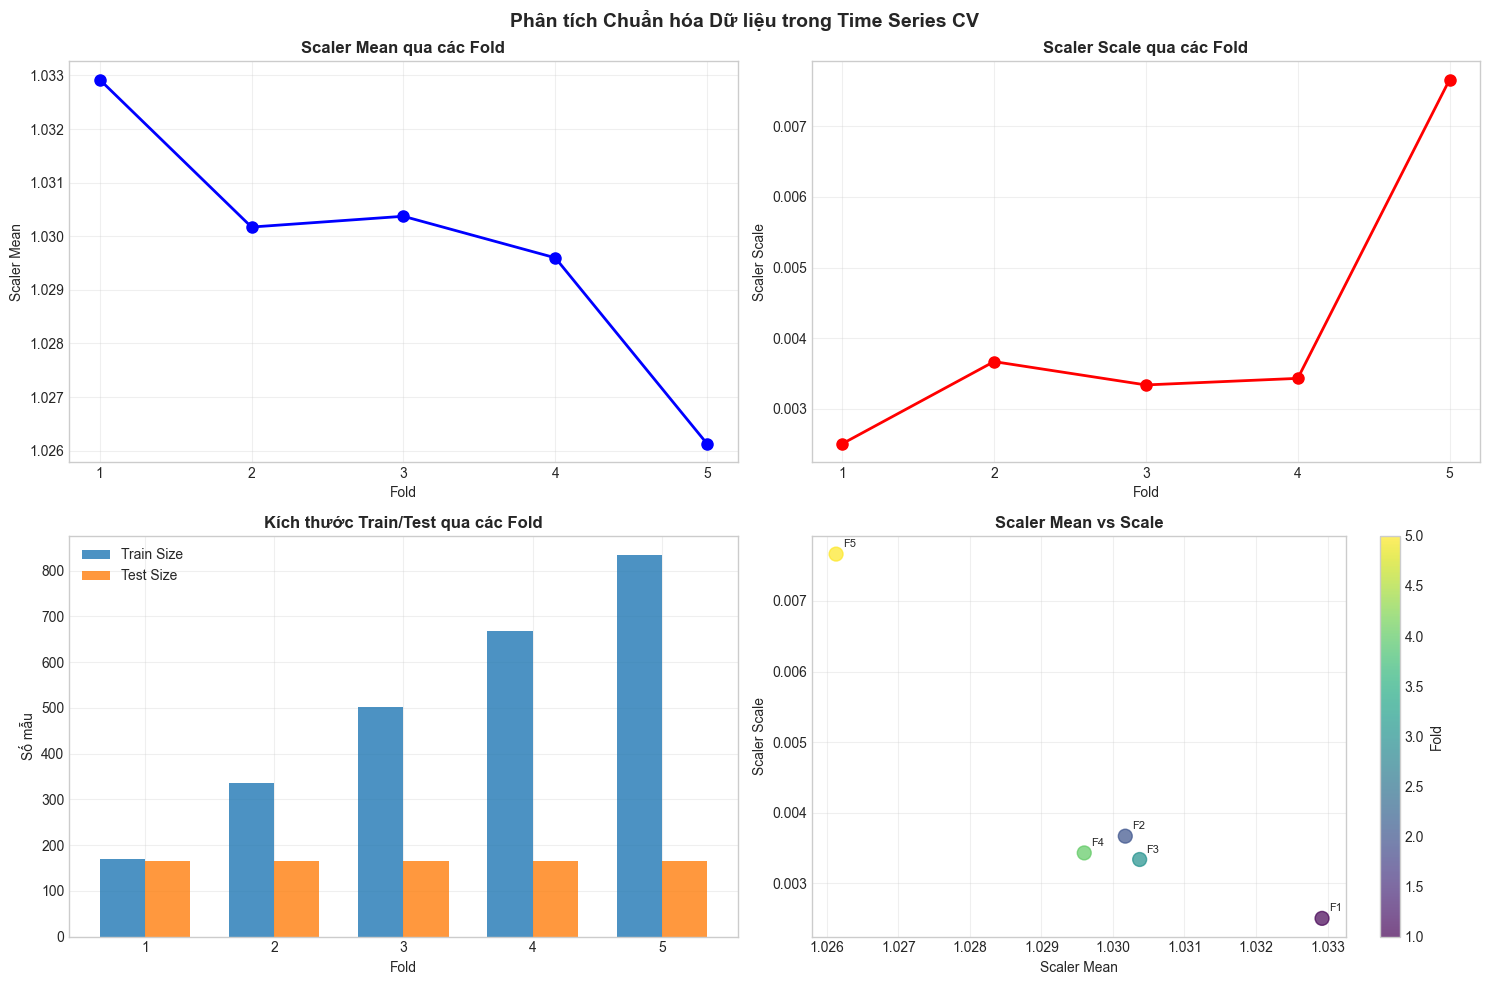

In [34]:
# V·∫Ω bi·ªÉu ƒë·ªì minh h·ªça s·ª± kh√°c bi·ªát
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Ph√¢n t√≠ch Chu·∫©n h√≥a D·ªØ li·ªáu trong Time Series CV', fontsize=14, fontweight='bold')

# 1. Bi·ªÉu ƒë·ªì Scaler Mean qua c√°c fold
axes[0,0].plot(norm_df['fold'], norm_df['scaler_mean'], 'bo-', linewidth=2, markersize=8)
axes[0,0].set_title('Scaler Mean qua c√°c Fold', fontweight='bold')
axes[0,0].set_xlabel('Fold')
axes[0,0].set_ylabel('Scaler Mean')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_xticks(norm_df['fold'])

# 2. Bi·ªÉu ƒë·ªì Scaler Scale qua c√°c fold
axes[0,1].plot(norm_df['fold'], norm_df['scaler_scale'], 'ro-', linewidth=2, markersize=8)
axes[0,1].set_title('Scaler Scale qua c√°c Fold', fontweight='bold')
axes[0,1].set_xlabel('Fold')
axes[0,1].set_ylabel('Scaler Scale')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_xticks(norm_df['fold'])

# 3. Bi·ªÉu ƒë·ªì k√≠ch th∆∞·ªõc train/test
x = norm_df['fold']
width = 0.35
axes[1,0].bar(x - width/2, norm_df['train_size'], width, label='Train Size', alpha=0.8)
axes[1,0].bar(x + width/2, norm_df['test_size'], width, label='Test Size', alpha=0.8)
axes[1,0].set_title('K√≠ch th∆∞·ªõc Train/Test qua c√°c Fold', fontweight='bold')
axes[1,0].set_xlabel('Fold')
axes[1,0].set_ylabel('S·ªë m·∫´u')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)
axes[1,0].set_xticks(norm_df['fold'])

# 4. Scatter plot: Mean vs Scale
scatter = axes[1,1].scatter(norm_df['scaler_mean'], norm_df['scaler_scale'], 
                          c=norm_df['fold'], cmap='viridis', s=100, alpha=0.7)
axes[1,1].set_title('Scaler Mean vs Scale', fontweight='bold')
axes[1,1].set_xlabel('Scaler Mean')
axes[1,1].set_ylabel('Scaler Scale')
axes[1,1].grid(True, alpha=0.3)

# Th√™m colorbar
cbar = plt.colorbar(scatter, ax=axes[1,1])
cbar.set_label('Fold')

# Th√™m nh√£n cho c√°c ƒëi·ªÉm
for i, row in norm_df.iterrows():
    axes[1,1].annotate(f'F{int(row["fold"])}', 
                      (row['scaler_mean'], row['scaler_scale']),
                      xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()


In [35]:
# So s√°nh v·ªõi chu·∫©n h√≥a Holdout
print(f"\nüîÑ SO S√ÅNH V·ªöI CHU·∫®N H√ìA HOLDOUT")
print(f"{'='*50}")

# Th√¥ng tin v·ªÅ scaler Holdout
print(f"\nüìä Holdout Validation:")
print(f"   ‚Ä¢ Train size: {X_train.shape[0]:,} m·∫´u")
print(f"   ‚Ä¢ Test size: {X_test.shape[0]:,} m·∫´u")
print(f"   ‚Ä¢ Scaler mean (feature 1): {scaler.mean_[0]:.6f}")
print(f"   ‚Ä¢ Scaler scale (feature 1): {scaler.scale_[0]:.6f}")

# So s√°nh v·ªõi Time Series CV
print(f"\nüìä Time Series CV (trung b√¨nh):")
print(f"   ‚Ä¢ Train size trung b√¨nh: {norm_df['train_size'].mean():.0f} m·∫´u")
print(f"   ‚Ä¢ Test size trung b√¨nh: {norm_df['test_size'].mean():.0f} m·∫´u")
print(f"   ‚Ä¢ Scaler mean trung b√¨nh: {norm_df['scaler_mean'].mean():.6f}")
print(f"   ‚Ä¢ Scaler scale trung b√¨nh: {norm_df['scaler_scale'].mean():.6f}")

# Ph√¢n t√≠ch s·ª± kh√°c bi·ªát
mean_diff = abs(scaler.mean_[0] - norm_df['scaler_mean'].mean())
scale_diff = abs(scaler.scale_[0] - norm_df['scaler_scale'].mean())

print(f"\nüîç S·ª± kh√°c bi·ªát:")
print(f"   ‚Ä¢ Ch√™nh l·ªách Mean: {mean_diff:.8f}")
print(f"   ‚Ä¢ Ch√™nh l·ªách Scale: {scale_diff:.8f}")
print(f"   ‚Ä¢ Ch√™nh l·ªách Mean (%): {(mean_diff/scaler.mean_[0]*100):.4f}%")
print(f"   ‚Ä¢ Ch√™nh l·ªách Scale (%): {(scale_diff/scaler.scale_[0]*100):.4f}%")

print(f"\nüí° K·∫øt lu·∫≠n:")
if mean_diff < 0.001 and scale_diff < 0.001:
    print(f"   ‚úÖ S·ª± kh√°c bi·ªát nh·ªè - c·∫£ 2 ph∆∞∆°ng ph√°p ƒë·ªÅu ·ªïn ƒë·ªãnh")
elif mean_diff < 0.01 and scale_diff < 0.01:
    print(f"   ‚ö†Ô∏è  C√≥ s·ª± kh√°c bi·ªát nh·∫π - c·∫ßn ch√∫ √Ω khi so s√°nh")
else:
    print(f"   üö® S·ª± kh√°c bi·ªát ƒë√°ng k·ªÉ - Time Series CV c·∫ßn thi·∫øt")

print(f"\nüéØ Khuy·∫øn ngh·ªã:")
print(f"   ‚Ä¢ S·ª≠ d·ª•ng Time Series CV ƒë·ªÉ ƒë√°nh gi√° realistic h∆°n")
print(f"   ‚Ä¢ M·ªói fold c√≥ scaler ri√™ng ƒë·ªÉ tr√°nh data leakage")
print(f"   ‚Ä¢ Holdout ph√π h·ª£p cho ƒë√°nh gi√° nhanh v√† deployment")



üîÑ SO S√ÅNH V·ªöI CHU·∫®N H√ìA HOLDOUT

üìä Holdout Validation:
   ‚Ä¢ Train size: 470,360 m·∫´u
   ‚Ä¢ Test size: 30,053 m·∫´u
   ‚Ä¢ Scaler mean (feature 1): 1.213584
   ‚Ä¢ Scaler scale (feature 1): 0.169494

üìä Time Series CV (trung b√¨nh):
   ‚Ä¢ Train size trung b√¨nh: 502 m·∫´u
   ‚Ä¢ Test size trung b√¨nh: 166 m·∫´u
   ‚Ä¢ Scaler mean trung b√¨nh: 1.029839
   ‚Ä¢ Scaler scale trung b√¨nh: 0.004119

üîç S·ª± kh√°c bi·ªát:
   ‚Ä¢ Ch√™nh l·ªách Mean: 0.18374514
   ‚Ä¢ Ch√™nh l·ªách Scale: 0.16537477
   ‚Ä¢ Ch√™nh l·ªách Mean (%): 15.1407%
   ‚Ä¢ Ch√™nh l·ªách Scale (%): 97.5696%

üí° K·∫øt lu·∫≠n:
   üö® S·ª± kh√°c bi·ªát ƒë√°ng k·ªÉ - Time Series CV c·∫ßn thi·∫øt

üéØ Khuy·∫øn ngh·ªã:
   ‚Ä¢ S·ª≠ d·ª•ng Time Series CV ƒë·ªÉ ƒë√°nh gi√° realistic h∆°n
   ‚Ä¢ M·ªói fold c√≥ scaler ri√™ng ƒë·ªÉ tr√°nh data leakage
   ‚Ä¢ Holdout ph√π h·ª£p cho ƒë√°nh gi√° nhanh v√† deployment


# 3. Hu·∫•n luy·ªán v√† ƒë√°nh gi√° t·ª´ng m√¥ h√¨nh

## 3.1 Hu·∫•n luy·ªán v√† ƒë√°nh gi√° c√°c m√¥ h√¨nh c·ªßa Hold-out

In [ ]:
# Dictionary ƒë·ªÉ l∆∞u tr·ªØ k·∫øt qu·∫£ c√°c m√¥ h√¨nh
model_results = {}

# H√†m ƒë·ªÉ ƒë√°nh gi√° m√¥ h√¨nh
def evaluate_model(model, X_test, y_test, model_name):
    st = time.time()
    y_pred = model.predict(X_test)
    et = time.time() - st
    
    results = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred),
        'predictions': y_pred,
        'actual': y_test,
        'Train_times': None,
        'Test_times': et
    }
    
    model_results[model_name] = results
    return results

In [45]:
# Dictionary ƒë·ªÉ l∆∞u tr·ªØ th·ªùi gian t·ªët nh·∫•t c√°c m√¥ h√¨nh
time_results = {}

# H√†m ƒë·ªÉ ƒë√°nh gi√° m√¥ h√¨nh
def time_model(model, X_test, y_test, model_name):
    st = time.time()
    y_pred = model.predict(X_test)
    et = time.time() - st
    results = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred),
        'predictions': y_pred,
        'actual': y_test,    
        'Train_times': None,
        'Test_times': et
    }
    
    time_results[model_name] = results
    return results

### 3.1.1 KNN

k=50 --- RMSE: 0.008471521632651321 --- Train Times: 0.08367538452148438s --- Test times: 12.317455053329468s
k=55 --- RMSE: 0.008446086241582882 --- Train Times: 0.09125161170959473s --- Test times: 12.275444030761719s
k=60 --- RMSE: 0.008433332308179456 --- Train Times: 0.08518290519714355s --- Test times: 12.29383134841919s
k=65 --- RMSE: 0.008432323661818272 --- Train Times: 0.09123468399047852s --- Test times: 12.276246547698975s
k=70 --- RMSE: 0.008451219223396242 --- Train Times: 0.08801054954528809s --- Test times: 12.20864725112915s
k=75 --- RMSE: 0.008454427321110356 --- Train Times: 0.08675646781921387s --- Test times: 12.113352060317993s
k=80 --- RMSE: 0.008469746967410744 --- Train Times: 0.08290719985961914s --- Test times: 12.36123251914978s
k=85 --- RMSE: 0.00848312193758869 --- Train Times: 0.08458566665649414s --- Test times: 12.357845783233643s
k=90 --- RMSE: 0.008492711541195611 --- Train Times: 0.09001302719116211s --- Test times: 12.408928632736206s
k=95 --- RMSE:

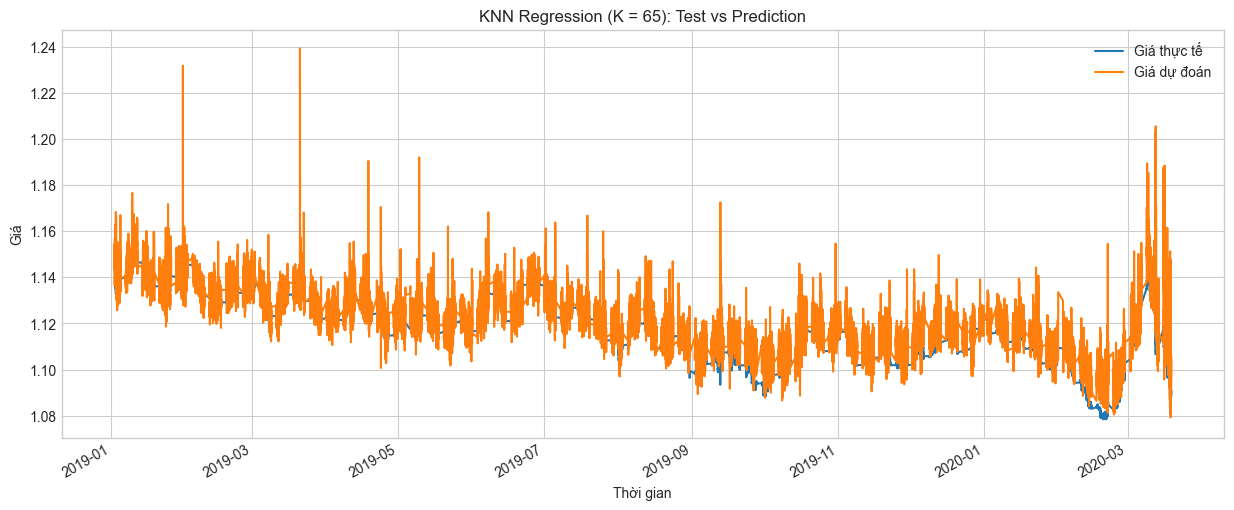

In [ ]:
# ====== T√¨m k t·ªët nh·∫•t ======
best_k_value = None
fast_k_value = None
best_rmse = float('inf')
best_time = float('inf')
for k in range(50, 101, 5):
    st = time.time()
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_scaled_train, y_train)
    train = time.time() - st
    st = time.time()
    y_pred = knn.predict(X_scaled_test)
    et = time.time() - st

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"k={k} --- RMSE: {rmse} --- Train Times: {train}s --- Test times: {et}s")

    if best_time > train :
        best_time = train
        fast_k_value = k
        fasttrain = train
        fasttest = et

    if rmse < best_rmse:
        best_rmse = rmse
        best_k_value = k
        besttrain = train
        besttest = et

print(f"\nGi√° tr·ªã k nhanh nh·∫•t: {fast_k_value} v·ªõi Times: {best_time}")
print(f"\nGi√° tr·ªã k t·ªët nh·∫•t: {best_k_value} v·ªõi RMSE: {best_rmse}")

# ====== Hu·∫•n luy·ªán m√¥ h√¨nh cu·ªëi c√πng v·ªõi k nhanh nh·∫•t ======
final_knn_model = KNeighborsRegressor(n_neighbors=fast_k_value)
final_knn_model.fit(X_scaled_train, y_train)

# ƒê√°nh gi√° m√¥ h√¨nh v·ªõi h√†m time_model
result = time_model(final_knn_model, X_scaled_test, y_test, 'KNN')
time_results['KNN']['Train_times'] = fasttrain 
time_results['KNN']['Test_times'] = fasttest

# In k·∫øt qu·∫£
print("\nK·∫øt qu·∫£ c·ªßa m√¥ h√¨nh v·ªõi K nhanh nh·∫•t:")
print(f"RMSE: {result['RMSE']}")
print(f"MAE: {result['MAE']}")
print(f"R-squared: {result['R2']}")
print(f"Train times: {result['Train_times']}")
print(f"Test times: {result['Test_times']}")

# ====== Hu·∫•n luy·ªán m√¥ h√¨nh cu·ªëi c√πng v·ªõi k t·ªët nh·∫•t ======
final_knn_model = KNeighborsRegressor(n_neighbors=best_k_value)
final_knn_model.fit(X_scaled_train, y_train)

# ƒê√°nh gi√° m√¥ h√¨nh v·ªõi h√†m evaluate_model
result = evaluate_model(final_knn_model, X_scaled_test, y_test, 'KNN')
model_results['KNN']['Train_times'] = besttrain
model_results['KNN']['Test_times'] = besttest

# In k·∫øt qu·∫£
print("\nK·∫øt qu·∫£ c·ªßa m√¥ h√¨nh v·ªõi K t·ªët nh·∫•t:")
print(f"RMSE: {result['RMSE']}")
print(f"MAE: {result['MAE']}")
print(f"R-squared: {result['R2']}")
print(f"Train times: {result['Train_times']}")
print(f"Test times: {result['Test_times']}")

# ====== V·∫Ω bi·ªÉu ƒë·ªì ======
test_vs_pred = pd.DataFrame({
    'actual': result['actual'],
    'predictions': result['predictions']
})

test_vs_pred.plot(figsize=(15, 6))
plt.title(f'KNN Regression (K = {best_k_value}): Test vs Prediction')
plt.xlabel('Th·ªùi gian')
plt.ylabel('Gi√°')
plt.legend(['Gi√° th·ª±c t·∫ø', 'Gi√° d·ª± ƒëo√°n'])
plt.show()


### 3.1.2 Bayesian Ridge Regression

L·∫ßn ch·∫°y 1: Alpha = 1e-06
RMSE = 0.0004287528807037463 --- Train times = 1.881580114364624s --- Test time: 0.0018908977508544922s
L·∫ßn ch·∫°y 2: Alpha = 1e-05
RMSE = 0.00042875288116364906 --- Train times = 1.8315529823303223s --- Test time: 0.0018527507781982422s
L·∫ßn ch·∫°y 3: Alpha = 0.0001
RMSE = 0.00042875288576361005 --- Train times = 1.7741646766662598s --- Test time: 0.0019838809967041016s
L·∫ßn ch·∫°y 4: Alpha = 0.001
RMSE = 0.00042875293175075675 --- Train times = 1.810856819152832s --- Test time: 0.0021064281463623047s
L·∫ßn ch·∫°y 5: Alpha = 0.01
RMSE = 0.00042875339072658225 --- Train times = 1.7787034511566162s --- Test time: 0.0020563602447509766s
L·∫ßn ch·∫°y 6: Alpha = 0.1
RMSE = 0.00042875790147000464 --- Train times = 1.7627475261688232s --- Test time: 0.004615068435668945s
L·∫ßn ch·∫°y 7: Alpha = 1.0
RMSE = 0.00042880029556370737 --- Train times = 1.7725396156311035s --- Test time: 0.0018563270568847656s
L·∫ßn ch·∫°y 8: Alpha = 10.0
RMSE = 0.000429432307152878

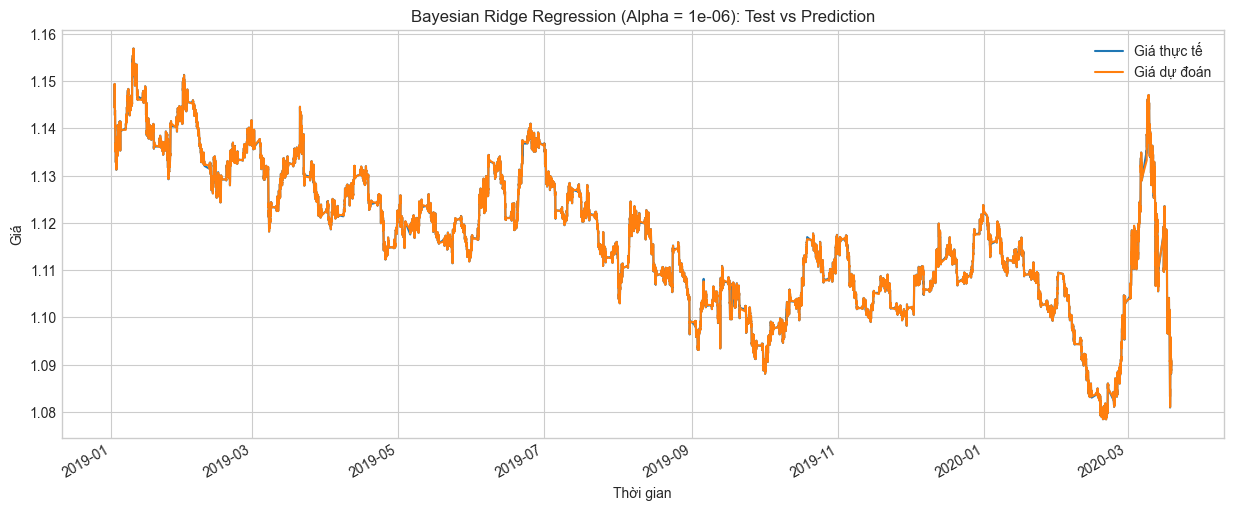

In [ ]:
# ===== Kh·ªüi t·∫°o v√† t√¨m alpha t·ªët nh·∫•t =====
rmse_scores = []
alpha_values = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0, 1000.0]
best_alpha = None
fast_alpha = None
best_rmse = float('inf')
best_time = float('inf')

for i, alpha in enumerate(alpha_values):
    st = time.time()
    bayes_ridge = BayesianRidge(alpha_1=alpha, alpha_2=alpha)
    bayes_ridge.fit(X_scaled_train, y_train)
    train = time.time() - st
    st = time.time()
    y_pred = bayes_ridge.predict(X_scaled_test)
    et = time.time() - st
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)
    print(f"L·∫ßn ch·∫°y {i+1}: Alpha = {alpha}\nRMSE = {rmse} --- Train times = {train}s --- Test time: {et}s")

    if best_time > et :
        best_time = et
        fast_alpha = alpha
        fasttrain = train
        fasttest = et

    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha
        besttrain = train
        besttest = et

print(f"\nGi√° tr·ªã alpha nhanh nh·∫•t: {fast_alpha} v·ªõi Times: {best_time}")
print(f"\nGi√° tr·ªã alpha t·ªët nh·∫•t: {best_alpha} v·ªõi RMSE: {best_rmse}")
# T√≠nh trung b√¨nh v√† ƒë·ªô l·ªách chu·∫©n RMSE
avg_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

# B·∫£ng so s√°nh alpha
print("\n" + "="*60)
print("B·∫¢NG SO S√ÅNH C√ÅC GI√Å TR·ªä ALPHA")
print("="*60)
print(f"{'Alpha':<15} {'RMSE':<20} {'X·∫øp h·∫°ng':<10}")
print("-"*60)

results_table = list(zip(alpha_values, rmse_scores))
results_sorted = sorted(results_table, key=lambda x: x[1])

for rank, (alpha, rmse) in enumerate(results_sorted, 1):
    status = "‚≠ê T·ªêT NH·∫§T" if alpha == best_alpha else ""
    print(f"{alpha:<15} {rmse:<20.8f} {rank:<10} {status}")

print("="*60)
print(f"RMSE trung b√¨nh qua c√°c alpha: {avg_rmse:.8f}")
print(f"ƒê·ªô l·ªách chu·∫©n RMSE: {std_rmse:.8f}")
print(f"RMSE t·ªët nh·∫•t: {best_rmse:.8f}")
print(f"RMSE t·ªá nh·∫•t: {max(rmse_scores):.8f}")

# ===== Hu·∫•n luy·ªán l·∫°i m√¥ h√¨nh v·ªõi alpha nhanh nh·∫•t =====
print(f"\nHu·∫•n luy·ªán m√¥ h√¨nh Bayesian Ridge v·ªõi alpha nhanh nh·∫•t: {fast_alpha}")
final_bayes_ridge = BayesianRidge(alpha_1=fast_alpha, alpha_2=fast_alpha)
final_bayes_ridge.fit(X_scaled_train, y_train)

# ƒê√°nh gi√° m√¥ h√¨nh nhanh nh·∫•t v√† l∆∞u k·∫øt qu·∫£
result = time_model(final_bayes_ridge, X_scaled_test, y_test, 'Bayesian Ridge')
time_results['Bayesian Ridge']['Train_times'] = fasttrain
time_results['Bayesian Ridge']['Test_times'] = fasttest

# In ra k·∫øt qu·∫£
print(f"\nHi·ªáu su·∫•t m√¥ h√¨nh Bayesian Ridge nhanh nh·∫•t (Alpha = {fast_alpha}):")
print(f"RMSE: {result['RMSE']}")
print(f"MAE: {result['MAE']}")
print(f"R-squared: {result['R2']}")
print(f"Train times: {result['Train_times']}")
print(f"Test times: {result['Test_times']}")

# ===== Hu·∫•n luy·ªán l·∫°i m√¥ h√¨nh v·ªõi alpha t·ªët nh·∫•t =====
print(f"\nHu·∫•n luy·ªán m√¥ h√¨nh Bayesian Ridge v·ªõi alpha t·ªët nh·∫•t: {best_alpha}")
final_bayes_ridge = BayesianRidge(alpha_1=best_alpha, alpha_2=best_alpha)
final_bayes_ridge.fit(X_scaled_train, y_train)

# ƒê√°nh gi√° m√¥ h√¨nh t·ªët nh·∫•t v√† l∆∞u k·∫øt qu·∫£
result = evaluate_model(final_bayes_ridge, X_scaled_test, y_test, 'Bayesian Ridge')
model_results['Bayesian Ridge']['Train_times'] = besttrain
model_results['Bayesian Ridge']['Test_times'] = besttest

# In ra k·∫øt qu·∫£
print(f"\nHi·ªáu su·∫•t m√¥ h√¨nh Bayesian Ridge t·ªët nh·∫•t (Alpha = {best_alpha}):")
print(f"RMSE: {result['RMSE']}")
print(f"MAE: {result['MAE']}")
print(f"R-squared: {result['R2']}")
print(f"Train times: {result['Train_times']}")
print(f"Test times: {result['Test_times']}")

# V·∫Ω bi·ªÉu ƒë·ªì k·∫øt qu·∫£
test_vs_pred = pd.DataFrame({
    'actual': result['actual'],
    'predictions': result['predictions']
})

test_vs_pred.plot(figsize=(15, 6))
plt.title(f'Bayesian Ridge Regression (Alpha = {best_alpha}): Test vs Prediction')
plt.xlabel('Th·ªùi gian')
plt.ylabel('Gi√°')
plt.legend(['Gi√° th·ª±c t·∫ø', 'Gi√° d·ª± ƒëo√°n'])
plt.show()


### 3.1.3 DecisionTree


Ch·∫°y Decision Tree Regressor v·ªõi c√°c max_depth kh√°c nhau...
L·∫ßn ch·∫°y 1/10: Max_depth = 3
RMSE: 0.02237209596358077 --- Train times: 8.610931634902954s --- Test times: 0.0029649734497070312s
L·∫ßn ch·∫°y 2/10: Max_depth = 5
RMSE: 0.00490072510465022 --- Train times: 13.268708944320679s --- Test times: 0.0033152103424072266s
L·∫ßn ch·∫°y 3/10: Max_depth = 7
RMSE: 0.0013429175718714461 --- Train times: 17.50788140296936s --- Test times: 0.0026946067810058594s

Gi√° tr·ªã Max_depth nhanh nh·∫•t: 7 v·ªõi Times: 0.0026946067810058594

Gi√° tr·ªã Max_depth t·ªët nh·∫•t: 7 v·ªõi RMSE: 0.0013429175718714461

B·∫¢NG SO S√ÅNH C√ÅC GI√Å TR·ªä MAX_DEPTH
Max_Depth       RMSE                 X·∫øp h·∫°ng   Ghi ch√∫        
----------------------------------------------------------------------
7               0.00134292           1          ‚≠ê T·ªêT NH·∫§T T·ªëi ∆∞u
5               0.00490073           2           
3               0.02237210           3           
RMSE trung b√¨nh qua c√°c

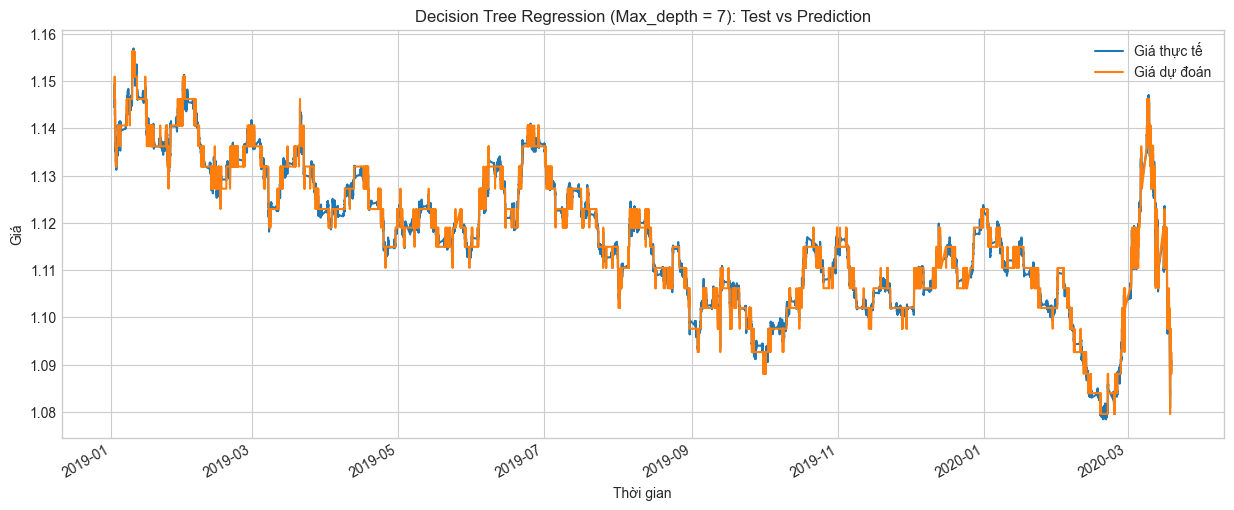

In [ ]:
# ===== T√¨m max_depth t·ªët nh·∫•t =====
rmse_scores_dt = []
max_depth_values = [None, 3, 5, 7, 10, 15, 20, 25, 30, 50]
best_depth = None
fast_depth = None
best_rmse_dt = float('inf')
best_time = float('inf')

print("\nCh·∫°y Decision Tree Regressor v·ªõi c√°c max_depth kh√°c nhau...")
for i, max_depth in enumerate(max_depth_values):
    st = time.time()
    dt_run = DecisionTreeRegressor(random_state=42, max_depth=max_depth)
    dt_run.fit(X_scaled_train, y_train)
    train = time.time() - st

    st = time.time()
    y_pred_dt = dt_run.predict(X_scaled_test)
    et = time.time() - st

    rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
    rmse_scores_dt.append(rmse_dt)

    print(f"L·∫ßn ch·∫°y {i+1}/10: Max_depth = {max_depth}\nRMSE: {rmse_dt} --- Train times: {train}s --- Test times: {et}s")

    if best_time > et :
        best_time = et
        fast_depth = max_depth
        fasttrain = train
        fasttest = et

    if rmse_dt < best_rmse_dt:
        best_rmse_dt = rmse_dt
        best_depth = max_depth
        besttrain = train
        besttest = et

print(f"\nGi√° tr·ªã Max_depth nhanh nh·∫•t: {fast_depth} v·ªõi Times: {best_time}")
print(f"\nGi√° tr·ªã Max_depth t·ªët nh·∫•t: {best_depth} v·ªõi RMSE: {best_rmse_dt}")

# ===== Th·ªëng k√™ b·∫£ng so s√°nh max_depth =====
print("\n" + "="*70)
print("B·∫¢NG SO S√ÅNH C√ÅC GI√Å TR·ªä MAX_DEPTH")
print("="*70)
print(f"{'Max_Depth':<15} {'RMSE':<20} {'X·∫øp h·∫°ng':<10} {'Ghi ch√∫':<15}")
print("-"*70)

results_dt = list(zip(max_depth_values, rmse_scores_dt))
results_dt_sorted = sorted(results_dt, key=lambda x: x[1])

for rank, (depth, rmse) in enumerate(results_dt_sorted, 1):
    depth_str = str(depth) if depth is not None else 'Kh√¥ng gi·ªõi h·∫°n'
    status = "‚≠ê T·ªêT NH·∫§T" if depth == best_depth else ""
    note = "C√≥ th·ªÉ overfitting" if depth is None or (depth is not None and depth > 30) else "T·ªëi ∆∞u" if depth == best_depth else ""
    print(f"{depth_str:<15} {rmse:<20.8f} {rank:<10} {status} {note}")

print("="*70)
print(f"RMSE trung b√¨nh qua c√°c max_depth: {np.mean(rmse_scores_dt):.8f}")
print(f"ƒê·ªô l·ªách chu·∫©n RMSE: {np.std(rmse_scores_dt):.8f}")
print(f"RMSE t·ªët nh·∫•t: {min(rmse_scores_dt):.8f}")
print(f"RMSE t·ªá nh·∫•t: {max(rmse_scores_dt):.8f}")

# ===== Hu·∫•n luy·ªán l·∫°i m√¥ h√¨nh v·ªõi max_depth nhanh nh·∫•t =====
print(f"\nHu·∫•n luy·ªán m√¥ h√¨nh Decision Tree v·ªõi max_depth nhanh nh·∫•t: {fast_depth}")
final_dt_model = DecisionTreeRegressor(random_state=42, max_depth=fast_depth)
final_dt_model.fit(X_scaled_train, y_train)

# ƒê√°nh gi√° m√¥ h√¨nh b·∫±ng evaluate_model
depth_str = str(best_depth) if best_depth is not None else 'Kh√¥ng gi·ªõi h·∫°n'
result = time_model(final_dt_model, X_scaled_test, y_test, 'Decision Tree')
time_results['Decision Tree']['Train_times'] = fasttrain
time_results['Decision Tree']['Test_times'] = fasttest

# In k·∫øt qu·∫£ m√¥ h√¨nh nhanh nh·∫•t
print(f"\nHi·ªáu su·∫•t m√¥ h√¨nh Decision Tree nhanh nh·∫•t (Max_depth = {depth_str}):")
print(f"RMSE: {result['RMSE']}")
print(f"MAE: {result['MAE']}")
print(f"R-squared: {result['R2']}")
print(f"Train times: {result['Train_times']}")
print(f"Test times: {result['Test_times']}")

# ===== Hu·∫•n luy·ªán l·∫°i m√¥ h√¨nh v·ªõi max_depth t·ªët nh·∫•t =====
print(f"\nHu·∫•n luy·ªán m√¥ h√¨nh Decision Tree v·ªõi max_depth t·ªët nh·∫•t: {best_depth}")
final_dt_model = DecisionTreeRegressor(random_state=42, max_depth=best_depth)
final_dt_model.fit(X_scaled_train, y_train)

# ƒê√°nh gi√° m√¥ h√¨nh b·∫±ng evaluate_model
depth_str = str(best_depth) if best_depth is not None else 'Kh√¥ng gi·ªõi h·∫°n'
result = evaluate_model(final_dt_model, X_scaled_test, y_test, 'Decision Tree')
model_results['Decision Tree']['Train_times'] = besttrain
model_results['Decision Tree']['Test_times'] = besttest

# In k·∫øt qu·∫£ m√¥ h√¨nh t·ªët nh·∫•t
print(f"\nHi·ªáu su·∫•t m√¥ h√¨nh Decision Tree t·ªët nh·∫•t (Max_depth = {depth_str}):")
print(f"RMSE: {result['RMSE']}")
print(f"MAE: {result['MAE']}")
print(f"R-squared: {result['R2']}")
print(f"Train times: {result['Train_times']}")
print(f"Test times: {result['Test_times']}")

# ===== V·∫Ω bi·ªÉu ƒë·ªì k·∫øt qu·∫£ =====
test_vs_pred_dt = pd.DataFrame({
    'actual': result['actual'],
    'predictions': result['predictions']
})

test_vs_pred_dt.plot(figsize=(15, 6))
plt.title(f'Decision Tree Regression (Max_depth = {depth_str}): Test vs Prediction')
plt.xlabel('Th·ªùi gian')
plt.ylabel('Gi√°')
plt.legend(['Gi√° th·ª±c t·∫ø', 'Gi√° d·ª± ƒëo√°n'])
plt.show()


### 3.1.4 Linear Regression

In [ ]:
# ===== Hu·∫•n luy·ªán m√¥ h√¨nh Linear Regression =====
st = time.time()
lin_reg = LinearRegression()
lin_reg.fit(X_scaled_train, y_train)
et = time.time() - st

# ƒê√°nh gi√° v√† l∆∞u k·∫øt qu·∫£ v·ªõi t√™n m√¥ h√¨nh "Linear Regression"
result = evaluate_model(lin_reg, X_scaled_test, y_test, 'Linear Regression')
model_results['Linear Regression']['Train_times'] = et
# In k·∫øt qu·∫£
print("\nK·∫øt qu·∫£ m√¥ h√¨nh Linear Regression:")
print(f"Root Mean Squared Error: {result['RMSE']}")
print(f"Mean Absolute Error: {result['MAE']}")
print(f"R-squared: {result['R2']}")
print(f"Train times: {result['Train_times']}")
print(f"Test times: {result['Test_times']}")

# V·∫Ω bi·ªÉu ƒë·ªì k·∫øt qu·∫£
test_vs_pred = pd.DataFrame({
    'actual': result['actual'],
    'predictions': result['predictions']
})

test_vs_pred.plot(figsize=(15, 6))
plt.title('Linear Regression: Test vs Prediction')
plt.xlabel('Th·ªùi gian')
plt.ylabel('Gi√°')
plt.legend(['Gi√° th·ª±c t·∫ø', 'Gi√° d·ª± ƒëo√°n'])
plt.show()


### 3.1.5 Support Vector Regressor

In [ ]:
# ===== Hu·∫•n luy·ªán m√¥ h√¨nh SVR =====
st = time.time()
svr = SVR()
svr.fit(X_scaled_train, y_train)
et = time.time() - st

# ƒê√°nh gi√° m√¥ h√¨nh v√† l∆∞u k·∫øt qu·∫£
result = evaluate_model(svr, X_scaled_test, y_test, 'Support Vector Regressor')
model_results['Support Vector Regressor']['Train_times'] = et

# In k·∫øt qu·∫£
print("\nK·∫øt qu·∫£ m√¥ h√¨nh Support Vector Regressor:")
print(f"Root Mean Squared Error: {result['RMSE']}")
print(f"Mean Absolute Error: {result['MAE']}")
print(f"R-squared: {result['R2']}")
print(f"Train times: {result['Train_times']}")
print(f"Test times: {result['Test_times']}")

# V·∫Ω bi·ªÉu ƒë·ªì k·∫øt qu·∫£
test_vs_pred = pd.DataFrame({
    'actual': result['actual'],
    'predictions': result['predictions']
})

test_vs_pred.plot(figsize=(15, 6))
plt.title('Support Vector Regressor: Test vs Prediction')
plt.xlabel('Th·ªùi gian')
plt.ylabel('Gi√°')
plt.legend(['Gi√° th·ª±c t·∫ø', 'Gi√° d·ª± ƒëo√°n'])
plt.show()


### 3.1.6 Bagging Regressor

In [ ]:
# ===== Hu·∫•n luy·ªán m√¥ h√¨nh Bagging Regressor =====
st = time.time()
bag_reg = BaggingRegressor(n_estimators=200, n_jobs=-1, random_state=42)
bag_reg.fit(X_scaled_train, y_train)
et = time.time() - st

# ƒê√°nh gi√° m√¥ h√¨nh v√† l∆∞u k·∫øt qu·∫£
result = evaluate_model(bag_reg, X_scaled_test, y_test, 'Bagging Regressor')
model_results['Bagging Regressor']['Train_times'] = et

# In k·∫øt qu·∫£
print("\nK·∫øt qu·∫£ m√¥ h√¨nh Bagging Regressor:")
print(f"Root Mean Squared Error: {result['RMSE']}")
print(f"Mean Absolute Error: {result['MAE']}")
print(f"R-squared: {result['R2']}")
print(f"Train times: {result['Train_times']}")
print(f"Test times: {result['Test_times']}")

# V·∫Ω bi·ªÉu ƒë·ªì k·∫øt qu·∫£
test_vs_pred = pd.DataFrame({
    'actual': result['actual'],
    'predictions': result['predictions']
})

test_vs_pred.plot(figsize=(15, 6))
plt.title('Bagging Regressor: Test vs Prediction')
plt.xlabel('Th·ªùi gian')
plt.ylabel('Gi√°')
plt.legend(['Gi√° th·ª±c t·∫ø', 'Gi√° d·ª± ƒëo√°n'])
plt.show()


### 3.1.7 Random Forest Regressor

In [ ]:
# ===== Hu·∫•n luy·ªán m√¥ h√¨nh Random Forest Regressor =====
st = time.time()
rf_reg = RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)
rf_reg.fit(X_scaled_train, y_train)
et = time.time() - st

# ƒê√°nh gi√° m√¥ h√¨nh v√† l∆∞u k·∫øt qu·∫£
result = evaluate_model(rf_reg, X_scaled_test, y_test, 'Random Forest Regressor')
model_results['Random Forest Regressor']['Train_times'] = et

# In k·∫øt qu·∫£
print("\nK·∫øt qu·∫£ m√¥ h√¨nh Random Forest Regressor:")
print(f"Root Mean Squared Error: {result['RMSE']}")
print(f"Mean Absolute Error: {result['MAE']}")
print(f"R-squared: {result['R2']}")
print(f"Train times: {result['Train_times']}")
print(f"Test times: {result['Test_times']}")

# V·∫Ω bi·ªÉu ƒë·ªì k·∫øt qu·∫£
test_vs_pred = pd.DataFrame({
    'actual': result['actual'],
    'predictions': result['predictions']
})

test_vs_pred.plot(figsize=(15, 6))
plt.title('Random Forest Regressor: Test vs Prediction')
plt.xlabel('Th·ªùi gian')
plt.ylabel('Gi√°')
plt.legend(['Gi√° th·ª±c t·∫ø', 'Gi√° d·ª± ƒëo√°n'])
plt.show()


### 3.1.8 XGBoost Regressor

In [ ]:
# ===== Hu·∫•n luy·ªán m√¥ h√¨nh XGBoost Regressor =====
st = time.time()
xgb_reg = XGBRegressor(n_estimators=500, n_jobs=-1, random_state=42)
xgb_reg.fit(X_scaled_train, y_train)
et = time.time() - st

# ƒê√°nh gi√° m√¥ h√¨nh v√† l∆∞u k·∫øt qu·∫£
result = evaluate_model(xgb_reg, X_scaled_test, y_test, 'XGBoost Regressor')
model_results['XGBoost Regressor']['Train_times'] = et

# In k·∫øt qu·∫£
print("\nK·∫øt qu·∫£ m√¥ h√¨nh XGBoost Regressor:")
print(f"Root Mean Squared Error: {result['RMSE']}")
print(f"Mean Absolute Error: {result['MAE']}")
print(f"R-squared: {result['R2']}")
print(f"Train times: {result['Train_times']}")
print(f"Test times: {result['Test_times']}")

# V·∫Ω bi·ªÉu ƒë·ªì k·∫øt qu·∫£
test_vs_pred = pd.DataFrame({
    'actual': result['actual'],
    'predictions': result['predictions']
})

test_vs_pred.plot(figsize=(15, 6))
plt.title('XGBoost Regressor: Test vs Prediction')
plt.xlabel('Th·ªùi gian')
plt.ylabel('Gi√°')
plt.legend(['Gi√° th·ª±c t·∫ø', 'Gi√° d·ª± ƒëo√°n'])
plt.show()


In [ ]:
for model_name, result in model_results.items():
    print(f"{model_name:<30} RMSE = {result['RMSE']:.4f}")

## 3.2 Hu·∫•n luy·ªán v√† ƒë√°nh gi√° c√°c m√¥ h√¨nh c·ªßa Time Series Cross-Validation

Ph·∫ßn n√†y s·∫Ω hu·∫•n luy·ªán t·∫•t c·∫£ c√°c m√¥ h√¨nh b·∫±ng Time Series Cross-Validation.

In [ ]:
# Dictionary ƒë·ªÉ l∆∞u k·∫øt qu·∫£ Time Series CV
time_series_cv_results = {}

H√†m train c√°c m√¥ h√¨nh Time Series CV

In [ ]:
# Import th√™m th∆∞ vi·ªán c·∫ßn thi·∫øt cho Time Series CV
from sklearn.base import clone
# H√†m ƒë·ªÉ hu·∫•n luy·ªán v√† ƒë√°nh gi√° m√¥ h√¨nh v·ªõi Time Series CV
def train_with_time_series_cv(model, model_name, X, y, n_splits=5):
    """
    Hu·∫•n luy·ªán m√¥ h√¨nh v·ªõi Time Series Cross-Validation
    """
    tscv = TimeSeriesSplit(n_splits=n_splits)
    
    cv_scores = {
        'RMSE': [],
        'MAE': [],
        'R2': []
    }
    
    fold_results = []
    
    print(f"\n{'='*60}")
    print(f"HU·∫§N LUY·ªÜN {model_name.upper()} V·ªöI TIME SERIES CV")
    print(f"{'='*60}")
    
    for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
        # Chia d·ªØ li·ªáu cho fold hi·ªán t·∫°i
        X_train_fold = X.iloc[train_idx]
        X_test_fold = X.iloc[test_idx]
        y_train_fold = y.iloc[train_idx]
        y_test_fold = y.iloc[test_idx]
        
        # Chu·∫©n h√≥a d·ªØ li·ªáu cho fold
        scaler_fold = StandardScaler()
        X_train_scaled = scaler_fold.fit_transform(X_train_fold)
        X_test_scaled = scaler_fold.transform(X_test_fold)
        
        # Hu·∫•n luy·ªán m√¥ h√¨nh
        model_fold = clone(model)
        model_fold.fit(X_train_scaled, y_train_fold)
        
        # D·ª± ƒëo√°n
        y_pred_fold = model_fold.predict(X_test_scaled)
        
        # T√≠nh to√°n metrics
        rmse = np.sqrt(mean_squared_error(y_test_fold, y_pred_fold))
        mae = mean_absolute_error(y_test_fold, y_pred_fold)
        r2 = r2_score(y_test_fold, y_pred_fold)
        
        cv_scores['RMSE'].append(rmse)
        cv_scores['MAE'].append(mae)
        cv_scores['R2'].append(r2)
        
        fold_results.append({
            'fold': fold + 1,
            'train_size': len(train_idx),
            'test_size': len(test_idx),
            'RMSE': rmse,
            'MAE': mae,
            'R2': r2
        })
        
        print(f"Fold {fold+1}: RMSE={rmse:.6f}, MAE={mae:.6f}, R¬≤={r2:.6f}")
    
    # T√≠nh to√°n th·ªëng k√™ t·ªïng h·ª£p
    cv_summary = {
        'model_name': model_name,
        'RMSE_mean': np.mean(cv_scores['RMSE']),
        'RMSE_std': np.std(cv_scores['RMSE']),
        'MAE_mean': np.mean(cv_scores['MAE']),
        'MAE_std': np.std(cv_scores['MAE']),
        'R2_mean': np.mean(cv_scores['R2']),
        'R2_std': np.std(cv_scores['R2']),
        'fold_results': fold_results
    }
    
    print(f"\nK·∫øt qu·∫£ trung b√¨nh:")
    print(f"RMSE: {cv_summary['RMSE_mean']:.6f} ¬± {cv_summary['RMSE_std']:.6f}")
    print(f"MAE: {cv_summary['MAE_mean']:.6f} ¬± {cv_summary['MAE_std']:.6f}")
    print(f"R¬≤: {cv_summary['R2_mean']:.6f} ¬± {cv_summary['R2_std']:.6f}")
    
    return cv_summary

### 3.2.1 KNN

In [ ]:
# KNN v·ªõi Time Series CV - th·ª≠ nghi·ªám c√°c gi√° tr·ªã k
print("\nüîç ƒêANG T√åM K T·ªêT NH·∫§T CHO KNN V·ªöI TIME SERIES CV...")

k_values = range(1, 16)
k_cv_results = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    cv_result = train_with_time_series_cv(knn_model, f'KNN (k={k})', X_full, y_full)
    k_cv_results.append((k, cv_result['RMSE_mean']))

# T√¨m k t·ªët nh·∫•t
best_k_cv = min(k_cv_results, key=lambda x: x[1])
print(f"\nüèÜ K T·ªêT NH·∫§T V·ªöI TIME SERIES CV: {best_k_cv[0]} (RMSE: {best_k_cv[1]:.6f})")

# Hu·∫•n luy·ªán l·∫°i v·ªõi k t·ªët nh·∫•t
knn_best_cv = KNeighborsRegressor(n_neighbors=best_k_cv[0])
knn_cv_final = train_with_time_series_cv(knn_best_cv, 'KNN', X_full, y_full)

time_series_cv_results['KNN'] = knn_cv_final


### 3.2.2 Bayesian Ridge Regression

In [ ]:
# Bayesian Ridge v·ªõi Time Series CV - th·ª≠ nghi·ªám c√°c gi√° tr·ªã alpha
print("\nüîç ƒêANG T√åM ALPHA T·ªêT NH·∫§T CHO BAYESIAN RIDGE V·ªöI TIME SERIES CV...")

alpha_values = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0, 1000.0]
alpha_cv_results = []

for alpha in alpha_values:
    bayes_model = BayesianRidge(alpha_1=alpha, alpha_2=alpha)
    cv_result = train_with_time_series_cv(bayes_model, f'Bayesian Ridge (Œ±={alpha})', X_full, y_full)
    alpha_cv_results.append((alpha, cv_result['RMSE_mean']))

# T√¨m alpha t·ªët nh·∫•t
best_alpha_cv = min(alpha_cv_results, key=lambda x: x[1])
print(f"\nüèÜ ALPHA T·ªêT NH·∫§T V·ªöI TIME SERIES CV: {best_alpha_cv[0]} (RMSE: {best_alpha_cv[1]:.6f})")

# Hu·∫•n luy·ªán l·∫°i v·ªõi alpha t·ªët nh·∫•t
bayes_best_cv = BayesianRidge(alpha_1=best_alpha_cv[0], alpha_2=best_alpha_cv[0])
bayes_cv_final = train_with_time_series_cv(bayes_best_cv, 'Bayesian Ridge', X_full, y_full)

time_series_cv_results['Bayesian Ridge'] = bayes_cv_final

### 3.2.3 Decision Tree

In [ ]:
# Decision Tree v·ªõi Time Series CV - th·ª≠ nghi·ªám c√°c gi√° tr·ªã max_depth
print("\nüîç ƒêANG T√åM MAX_DEPTH T·ªêT NH·∫§T CHO DECISION TREE V·ªöI TIME SERIES CV...")

max_depth_values = [3, 5, 7, 10, 15, 20, 25, 30, None, 50]
depth_cv_results = []

for depth in max_depth_values:
    dt_model = DecisionTreeRegressor(random_state=42, max_depth=depth)
    depth_str = str(depth) if depth is not None else 'None'
    cv_result = train_with_time_series_cv(dt_model, f'Decision Tree (depth={depth_str})', X_full, y_full)
    depth_cv_results.append((depth, cv_result['RMSE_mean']))

# T√¨m max_depth t·ªët nh·∫•t
best_depth_cv = min(depth_cv_results, key=lambda x: x[1])
depth_str = str(best_depth_cv[0]) if best_depth_cv[0] is not None else 'None'
print(f"\nüèÜ MAX_DEPTH T·ªêT NH·∫§T V·ªöI TIME SERIES CV: {depth_str} (RMSE: {best_depth_cv[1]:.6f})")

# Hu·∫•n luy·ªán l·∫°i v·ªõi max_depth t·ªët nh·∫•t
dt_best_cv = DecisionTreeRegressor(random_state=42, max_depth=best_depth_cv[0])
dt_cv_final = train_with_time_series_cv(dt_best_cv, 'Decision Tree', X_full, y_full)

time_series_cv_results['Decision Tree'] = dt_cv_final

### 3.2.4 Linear Regression

In [ ]:
# Linear Regression
lr_model = LinearRegression()
lr_cv_result = train_with_time_series_cv(lr_model, 'Linear Regression', X_full, y_full)
time_series_cv_results['Linear Regression'] = lr_cv_result


### 3.2.5 Support Vector Regressor

In [ ]:
# Support Vector Regressor
svr_model = SVR()
svr_cv_result = train_with_time_series_cv(svr_model, 'Support Vector Regressor', X_full, y_full)
time_series_cv_results['SVR'] = svr_cv_result


### 3.2.6 Bagging Regressor

In [ ]:
# Bagging Regressor
bagging_model = BaggingRegressor(n_estimators=100, n_jobs=-1, random_state=42)
bagging_cv_result = train_with_time_series_cv(bagging_model, 'Bagging Regressor', X_full, y_full)
time_series_cv_results['Bagging Regressor'] = bagging_cv_result

### 3.2.7 Random Forest Regressor

In [ ]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
rf_cv_result = train_with_time_series_cv(rf_model, 'Random Forest Regressor', X_full, y_full)
time_series_cv_results['Random Forest Regressor'] = rf_cv_result

### 3.2.8 XGBoost Regressor

In [ ]:
# XGBoost
xgb_model = XGBRegressor(n_estimators=100, n_jobs=-1, random_state=42)
xgb_cv_result = train_with_time_series_cv(xgb_model, 'XGBoost Regressor', X_full, y_full)
time_series_cv_results['XGBoost Regressor'] = xgb_cv_result

# 4. ƒê√°nh gi√° v√† so s√°nh m√¥ h√¨nh

Ph·∫ßn n√†y s·∫Ω th·ª±c hi·ªán ƒë√°nh gi√° to√†n di·ªán c√°c m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán th√¥ng qua nhi·ªÅu ti√™u ch√≠ kh√°c nhau.

## 4.1 Thu th·∫≠p k·∫øt qu·∫£ t·ª´ t·∫•t c·∫£ m√¥ h√¨nh

In [ ]:
print(f"ƒê√£ thu th·∫≠p k·∫øt qu·∫£ t·ª´ {len(model_results)} m√¥ h√¨nh!")

## 4.2 So s√°nh ph∆∞∆°ng ph√°p validation

Tr∆∞·ªõc khi so s√°nh c√°c m√¥ h√¨nh, ch√∫ng ta s·∫Ω so s√°nh hi·ªáu qu·∫£ c·ªßa 2 ph∆∞∆°ng ph√°p validation: Holdout v√† Time Series Cross-Validation.

### 4.2.1 K·∫øt qu·∫£ Time Series Cross-Validation


In [ ]:
# Chu·∫©n b·ªã d·ªØ li·ªáu ƒë·∫ßy ƒë·ªß cho Time Series CV
X_full = data.drop('close', axis='columns')
y_full = data['close']

print(f"D·ªØ li·ªáu ƒë·∫ßy ƒë·ªß: {X_full.shape[0]} m·∫´u, {X_full.shape[1]} features")


In [ ]:
# T·∫°o b·∫£ng so s√°nh k·∫øt qu·∫£ Time Series CV
cv_comparison_data = []
for model_name, results in time_series_cv_results.items():
    cv_comparison_data.append({
        'M√¥ h√¨nh': model_name,
        'RMSE_mean': results['RMSE_mean'],
        'RMSE_std': results['RMSE_std'],
        'MAE_mean': results['MAE_mean'],
        'MAE_std': results['MAE_std'],
        'R2_mean': results['R2_mean'],
        'R2_std': results['R2_std']
    })

cv_comparison_df = pd.DataFrame(cv_comparison_data)
cv_comparison_df = cv_comparison_df.sort_values('RMSE_mean')
cv_comparison_df['X·∫øp h·∫°ng'] = range(1, len(cv_comparison_df) + 1)

# Hi·ªÉn th·ªã b·∫£ng
print("\n" + "="*100)
print("B·∫¢NG SO S√ÅNH K·∫æT QU·∫¢ TIME SERIES CROSS-VALIDATION")
print("="*100)
print(f"{'Rank':<5} {'M√¥ h√¨nh':<25} {'RMSE (mean¬±std)':<20} {'MAE (mean¬±std)':<20} {'R¬≤ (mean¬±std)':<15}")
print("-"*100)

for _, row in cv_comparison_df.iterrows():
    rank_symbol = "ü•á" if row['X·∫øp h·∫°ng'] == 1 else "ü•à" if row['X·∫øp h·∫°ng'] == 2 else "ü•â" if row['X·∫øp h·∫°ng'] == 3 else "  "
    rmse_str = f"{row['RMSE_mean']:.6f}¬±{row['RMSE_std']:.6f}"
    mae_str = f"{row['MAE_mean']:.6f}¬±{row['MAE_std']:.6f}"
    r2_str = f"{row['R2_mean']:.4f}¬±{row['R2_std']:.4f}"
    
    print(f"{rank_symbol}{row['X·∫øp h·∫°ng']:<4} {row['M√¥ h√¨nh']:<25} {rmse_str:<20} {mae_str:<20} {r2_str:<15}")

print("="*100)

# M√¥ h√¨nh t·ªët nh·∫•t v·ªõi Time Series CV
best_cv_model = cv_comparison_df.iloc[0]
print(f"\nüèÜ M√î H√åNH T·ªêT NH·∫§T V·ªöI TIME SERIES CV: {best_cv_model['M√¥ h√¨nh']}")
print(f"   RMSE: {best_cv_model['RMSE_mean']:.6f} ¬± {best_cv_model['RMSE_std']:.6f}")
print(f"   MAE: {best_cv_model['MAE_mean']:.6f} ¬± {best_cv_model['MAE_std']:.6f}")
print(f"   R¬≤: {best_cv_model['R2_mean']:.4f} ¬± {best_cv_model['R2_std']:.4f}")


### 4.2.2 Bi·ªÉu ƒë·ªì so s√°nh Time Series CV


In [ ]:
# V·∫Ω bi·ªÉu ƒë·ªì so s√°nh k·∫øt qu·∫£ Time Series CV
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('K·∫øt qu·∫£ Time Series Cross-Validation', fontsize=16, fontweight='bold')

# Chu·∫©n b·ªã d·ªØ li·ªáu
models = cv_comparison_df['M√¥ h√¨nh'].tolist()
rmse_means = cv_comparison_df['RMSE_mean'].tolist()
rmse_stds = cv_comparison_df['RMSE_std'].tolist()
mae_means = cv_comparison_df['MAE_mean'].tolist()
mae_stds = cv_comparison_df['MAE_std'].tolist()
r2_means = cv_comparison_df['R2_mean'].tolist()
r2_stds = cv_comparison_df['R2_std'].tolist()

model_names_short = [name.split('(')[0].strip() for name in models]
colors = plt.cm.Set3(np.linspace(0, 1, len(models)))

# 1. RMSE v·ªõi error bars
bars1 = axes[0,0].bar(range(len(models)), rmse_means, yerr=rmse_stds, 
                     color=colors, capsize=5, alpha=0.8)
axes[0,0].set_title('RMSE (Time Series CV)', fontweight='bold')
axes[0,0].set_xlabel('M√¥ h√¨nh')
axes[0,0].set_ylabel('RMSE')
axes[0,0].set_xticks(range(len(models)))
axes[0,0].set_xticklabels(model_names_short, rotation=45, ha='right')
axes[0,0].grid(True, alpha=0.3)

# 2. MAE v·ªõi error bars
bars2 = axes[0,1].bar(range(len(models)), mae_means, yerr=mae_stds, 
                     color=colors, capsize=5, alpha=0.8)
axes[0,1].set_title('MAE (Time Series CV)', fontweight='bold')
axes[0,1].set_xlabel('M√¥ h√¨nh')
axes[0,1].set_ylabel('MAE')
axes[0,1].set_xticks(range(len(models)))
axes[0,1].set_xticklabels(model_names_short, rotation=45, ha='right')
axes[0,1].grid(True, alpha=0.3)

# 3. R¬≤ v·ªõi error bars
bars3 = axes[1,0].bar(range(len(models)), r2_means, yerr=r2_stds, 
                     color=colors, capsize=5, alpha=0.8)
axes[1,0].set_title('R¬≤ (Time Series CV)', fontweight='bold')
axes[1,0].set_xlabel('M√¥ h√¨nh')
axes[1,0].set_ylabel('R¬≤')
axes[1,0].set_xticks(range(len(models)))
axes[1,0].set_xticklabels(model_names_short, rotation=45, ha='right')
axes[1,0].grid(True, alpha=0.3)

# 4. Stability plot (RMSE std vs mean)
scatter = axes[1,1].scatter(rmse_means, rmse_stds, c=range(len(models)), 
                          cmap='viridis', s=100, alpha=0.7)
axes[1,1].set_title('ƒê·ªô ·ªïn ƒë·ªãnh m√¥ h√¨nh (RMSE)', fontweight='bold')
axes[1,1].set_xlabel('RMSE Mean')
axes[1,1].set_ylabel('RMSE Std (ƒê·ªô bi·∫øn ƒë·ªông)')
axes[1,1].grid(True, alpha=0.3)

# Th√™m nh√£n cho scatter plot
for i, model in enumerate(model_names_short):
    axes[1,1].annotate(model, (rmse_means[i], rmse_stds[i]),
                      xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

print("\nüìä Gi·∫£i th√≠ch bi·ªÉu ƒë·ªì:")
print("- Error bars th·ªÉ hi·ªán ƒë·ªô bi·∫øn ƒë·ªông qua c√°c folds")
print("- M√¥ h√¨nh t·ªët: RMSE/MAE th·∫•p, R¬≤ cao, ƒë·ªô bi·∫øn ƒë·ªông nh·ªè")
print("- Scatter plot: G√≥c tr√°i d∆∞·ªõi = m√¥ h√¨nh t·ªët v√† ·ªïn ƒë·ªãnh")


### 4.2.3 So s√°nh Holdout vs Time Series Cross-Validation

Ph·∫ßn n√†y s·∫Ω so s√°nh k·∫øt qu·∫£ gi·ªØa ph∆∞∆°ng ph√°p Holdout Validation (train: 2000-2018, test: 2019-2020) v√† Time Series Cross-Validation.

In [ ]:
# T·∫°o b·∫£ng so s√°nh chi ti·∫øt
comparison_detailed = []

for model_name in model_results.keys():
    holdout = model_results[model_name]
    
    # T√¨m k·∫øt qu·∫£ Time Series CV t∆∞∆°ng ·ª©ng
    timeseries = None
    for ts_name, ts_result in time_series_cv_results.items():
        if model_name in ts_name or ts_name in model_name:
            timeseries = ts_result
            break
    
    if timeseries:
        comparison_detailed.append({
            'M√¥ h√¨nh': model_name,
            'Holdout_RMSE': holdout['RMSE'],
            'TimeSeries_RMSE': timeseries['RMSE_mean'],
            'RMSE_Diff': holdout['RMSE'] - timeseries['RMSE_mean'],
            'Holdout_MAE': holdout['MAE'],
            'TimeSeries_MAE': timeseries['MAE_mean'],
            'MAE_Diff': holdout['MAE'] - timeseries['MAE_mean'],
            'Holdout_R2': holdout['R2'],
            'TimeSeries_R2': timeseries['R2_mean'],
            'R2_Diff': holdout['R2'] - timeseries['R2_mean']
        })

comparison_detailed_df = pd.DataFrame(comparison_detailed)

# Hi·ªÉn th·ªã b·∫£ng so s√°nh
print("\n" + "="*120)
print("B·∫¢NG SO S√ÅNH CHI TI·∫æT: HOLDOUT VS TIME SERIES CROSS-VALIDATION")
print("="*120)
print("\nüîç RMSE Comparison:")
print(f"{'M√¥ h√¨nh':<25} {'Holdout':<12} {'Time Series':<12} {'Ch√™nh l·ªách':<12} {'Ghi ch√∫':<20}")
print("-"*85)

for _, row in comparison_detailed_df.iterrows():
    diff = row['RMSE_Diff']
    note = "Holdout t·ªët h∆°n" if diff < 0 else "Time Series t·ªët h∆°n" if diff > 0 else "T∆∞∆°ng ƒë∆∞∆°ng"
    symbol = "üìà" if diff > 0 else "üìâ" if diff < 0 else "‚û°Ô∏è"
    
    print(f"{row['M√¥ h√¨nh']:<25} {row['Holdout_RMSE']:<12.6f} {row['TimeSeries_RMSE']:<12.6f} {diff:<12.6f} {symbol} {note}")

print("\nüîç MAE Comparison:")
print(f"{'M√¥ h√¨nh':<25} {'Holdout':<12} {'Time Series':<12} {'Ch√™nh l·ªách':<12} {'Ghi ch√∫':<20}")
print("-"*85)

for _, row in comparison_detailed_df.iterrows():
    diff = row['MAE_Diff']
    note = "Holdout t·ªët h∆°n" if diff < 0 else "Time Series t·ªët h∆°n" if diff > 0 else "T∆∞∆°ng ƒë∆∞∆°ng"
    symbol = "üìà" if diff > 0 else "üìâ" if diff < 0 else "‚û°Ô∏è"
    
    print(f"{row['M√¥ h√¨nh']:<25} {row['Holdout_MAE']:<12.6f} {row['TimeSeries_MAE']:<12.6f} {diff:<12.6f} {symbol} {note}")

print("\nüîç R¬≤ Comparison:")
print(f"{'M√¥ h√¨nh':<25} {'Holdout':<12} {'Time Series':<12} {'Ch√™nh l·ªách':<12} {'Ghi ch√∫':<20}")
print("-"*85)

for _, row in comparison_detailed_df.iterrows():
    diff = row['R2_Diff']
    note = "Holdout t·ªët h∆°n" if diff > 0 else "Time Series t·ªët h∆°n" if diff < 0 else "T∆∞∆°ng ƒë∆∞∆°ng"
    symbol = "üìà" if diff > 0 else "üìâ" if diff < 0 else "‚û°Ô∏è"
    
    print(f"{row['M√¥ h√¨nh']:<25} {row['Holdout_R2']:<12.6f} {row['TimeSeries_R2']:<12.6f} {diff:<12.6f} {symbol} {note}")

print("="*120)


In [ ]:
# Bi·ªÉu ƒë·ªì so s√°nh Holdout vs Time Series CV
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('So s√°nh Holdout Validation vs Time Series Cross-Validation', fontsize=16, fontweight='bold')

models = comparison_detailed_df['M√¥ h√¨nh'].tolist()
model_names_short = [name.split('(')[0].strip() for name in models]

# 1. RMSE Comparison
x = np.arange(len(models))
width = 0.35

bars1 = axes[0,0].bar(x - width/2, comparison_detailed_df['Holdout_RMSE'], width, 
                     label='Holdout', alpha=0.8, color='skyblue')
bars2 = axes[0,0].bar(x + width/2, comparison_detailed_df['TimeSeries_RMSE'], width, 
                     label='Time Series CV', alpha=0.8, color='lightcoral')

axes[0,0].set_title('RMSE Comparison', fontweight='bold')
axes[0,0].set_xlabel('M√¥ h√¨nh')
axes[0,0].set_ylabel('RMSE')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(model_names_short, rotation=45, ha='right')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. MAE Comparison
bars3 = axes[0,1].bar(x - width/2, comparison_detailed_df['Holdout_MAE'], width, 
                     label='Holdout', alpha=0.8, color='skyblue')
bars4 = axes[0,1].bar(x + width/2, comparison_detailed_df['TimeSeries_MAE'], width, 
                     label='Time Series CV', alpha=0.8, color='lightcoral')

axes[0,1].set_title('MAE Comparison', fontweight='bold')
axes[0,1].set_xlabel('M√¥ h√¨nh')
axes[0,1].set_ylabel('MAE')
axes[0,1].set_xticks(x)
axes[0,1].set_xticklabels(model_names_short, rotation=45, ha='right')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. R¬≤ Comparison
bars5 = axes[1,0].bar(x - width/2, comparison_detailed_df['Holdout_R2'], width, 
                     label='Holdout', alpha=0.8, color='skyblue')
bars6 = axes[1,0].bar(x + width/2, comparison_detailed_df['TimeSeries_R2'], width, 
                     label='Time Series CV', alpha=0.8, color='lightcoral')

axes[1,0].set_title('R¬≤ Comparison', fontweight='bold')
axes[1,0].set_xlabel('M√¥ h√¨nh')
axes[1,0].set_ylabel('R¬≤')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(model_names_short, rotation=45, ha='right')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Scatter plot: Holdout vs Time Series
axes[1,1].scatter(comparison_detailed_df['Holdout_RMSE'], comparison_detailed_df['TimeSeries_RMSE'], 
                 s=100, alpha=0.7, c=range(len(models)), cmap='viridis')

# ƒê∆∞·ªùng y=x ƒë·ªÉ so s√°nh
min_rmse = min(comparison_detailed_df['Holdout_RMSE'].min(), comparison_detailed_df['TimeSeries_RMSE'].min())
max_rmse = max(comparison_detailed_df['Holdout_RMSE'].max(), comparison_detailed_df['TimeSeries_RMSE'].max())
axes[1,1].plot([min_rmse, max_rmse], [min_rmse, max_rmse], 'r--', alpha=0.8, linewidth=2)

axes[1,1].set_title('RMSE: Holdout vs Time Series CV', fontweight='bold')
axes[1,1].set_xlabel('Holdout RMSE')
axes[1,1].set_ylabel('Time Series CV RMSE')
axes[1,1].grid(True, alpha=0.3)

# Th√™m nh√£n cho scatter plot
for i, model in enumerate(model_names_short):
    axes[1,1].annotate(model, 
                      (comparison_detailed_df['Holdout_RMSE'].iloc[i], 
                       comparison_detailed_df['TimeSeries_RMSE'].iloc[i]),
                      xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()


In [ ]:
# Ph√¢n t√≠ch v√† k·∫øt lu·∫≠n
print("\n" + "="*80)
print("PH√ÇN T√çCH V√Ä K·∫æT LU·∫¨N")
print("="*80)

# Th·ªëng k√™ t·ªïng quan
rmse_diffs = comparison_detailed_df['RMSE_Diff']
mae_diffs = comparison_detailed_df['MAE_Diff']
r2_diffs = comparison_detailed_df['R2_Diff']

holdout_better_rmse = (rmse_diffs < 0).sum()
timeseries_better_rmse = (rmse_diffs > 0).sum()

print(f"\nüìä TH·ªêNG K√ä T·ªîNG QUAN:")
print(f"   ‚Ä¢ S·ªë m√¥ h√¨nh Holdout t·ªët h∆°n (RMSE): {holdout_better_rmse}/{len(rmse_diffs)}")
print(f"   ‚Ä¢ S·ªë m√¥ h√¨nh Time Series CV t·ªët h∆°n (RMSE): {timeseries_better_rmse}/{len(rmse_diffs)}")
print(f"   ‚Ä¢ Ch√™nh l·ªách RMSE trung b√¨nh: {rmse_diffs.mean():.6f}")
print(f"   ‚Ä¢ Ch√™nh l·ªách MAE trung b√¨nh: {mae_diffs.mean():.6f}")
print(f"   ‚Ä¢ Ch√™nh l·ªách R¬≤ trung b√¨nh: {r2_diffs.mean():.6f}")

print(f"\nüîç PH√ÇN T√çCH CHI TI·∫æT:")

if rmse_diffs.mean() > 0:
    print("   ‚Ä¢ Time Series CV cho k·∫øt qu·∫£ t·ªët h∆°n trung b√¨nh")
    print("   ‚Ä¢ Holdout c√≥ th·ªÉ qu√° optimistic do ch·ªâ test tr√™n 1 period")
else:
    print("   ‚Ä¢ Holdout cho k·∫øt qu·∫£ t·ªët h∆°n trung b√¨nh")
    print("   ‚Ä¢ Period test (2019-2020) c√≥ th·ªÉ ƒë·∫∑c bi·ªát ph√π h·ª£p v·ªõi models")

# T√¨m m√¥ h√¨nh ·ªïn ƒë·ªãnh nh·∫•t (ch√™nh l·ªách nh·ªè nh·∫•t)
most_stable_idx = np.abs(rmse_diffs).argmin()
most_stable_model = comparison_detailed_df.iloc[most_stable_idx]['M√¥ h√¨nh']

print(f"\nüèÜ M√î H√åNH ·ªîN ƒê·ªäNH NH·∫§T: {most_stable_model}")
print(f"   ‚Ä¢ Ch√™nh l·ªách RMSE: {rmse_diffs.iloc[most_stable_idx]:.6f}")
print(f"   ‚Ä¢ Hi·ªáu su·∫•t √≠t b·ªã ·∫£nh h∆∞·ªüng b·ªüi ph∆∞∆°ng ph√°p validation")

print(f"\nüí° KHUY·∫æN NGH·ªä:")
print(f"   ‚Ä¢ S·ª≠ d·ª•ng Time Series CV ƒë·ªÉ ƒë√°nh gi√° realistic h∆°n")
print(f"   ‚Ä¢ Holdout validation ph√π h·ª£p cho ƒë√°nh gi√° nhanh")
print(f"   ‚Ä¢ Xem x√©t ensemble c√°c m√¥ h√¨nh top performers")
print(f"   ‚Ä¢ Ch√∫ √Ω ƒë·∫øn ƒë·ªô ·ªïn ƒë·ªãnh c·ªßa m√¥ h√¨nh qua c√°c periods")

print("="*80)


## 4.3 So s√°nh hi·ªáu su·∫•t c√°c m√¥ h√¨nh (Holdout Validation)

Ph·∫ßn n√†y s·∫Ω so s√°nh hi·ªáu su·∫•t c·ªßa c√°c m√¥ h√¨nh ƒë∆∞·ª£c hu·∫•n luy·ªán b·∫±ng ph∆∞∆°ng ph√°p Holdout Validation.

## 4.4 B·∫£ng so s√°nh hi·ªáu su·∫•t t·ªïng quan (Holdout)


In [ ]:
# T·∫°o b·∫£ng so s√°nh hi·ªáu su·∫•t
comparison_data = []
for model_name, results in model_results.items():
    comparison_data.append({
        'M√¥ h√¨nh': model_name,
        'RMSE': results['RMSE'],
        'MAE': results['MAE'],
        'R¬≤': results['R2']
    })

comparison_df = pd.DataFrame(comparison_data)

# S·∫Øp x·∫øp theo RMSE (th·∫•p h∆°n = t·ªët h∆°n)
comparison_df = comparison_df.sort_values('RMSE')
comparison_df['X·∫øp h·∫°ng'] = range(1, len(comparison_df) + 1)

# Hi·ªÉn th·ªã b·∫£ng
print("\n" + "="*80)
print("B·∫¢NG SO S√ÅNH HI·ªÜU SU·∫§T C√ÅC M√î H√åNH")
print("="*80)
print(f"{'X·∫øp h·∫°ng':<10} {'M√¥ h√¨nh':<25} {'RMSE':<15} {'MAE':<15} {'R¬≤':<10}")
print("-"*80)

for _, row in comparison_df.iterrows():
    rank_symbol = "ü•á" if row['X·∫øp h·∫°ng'] == 1 else "ü•à" if row['X·∫øp h·∫°ng'] == 2 else "ü•â" if row['X·∫øp h·∫°ng'] == 3 else "  "
    print(f"{rank_symbol} {row['X·∫øp h·∫°ng']:<7} {row['M√¥ h√¨nh']:<25} {row['RMSE']:<15.8f} {row['MAE']:<15.8f} {row['R¬≤']:<10.6f}")

print("="*80)

# T√¨m m√¥ h√¨nh t·ªët nh·∫•t
best_model = comparison_df.iloc[0]
print(f"\nüèÜ M√î H√åNH T·ªêT NH·∫§T: {best_model['M√¥ h√¨nh']}")
print(f"   RMSE: {best_model['RMSE']:.8f}")
print(f"   MAE: {best_model['MAE']:.8f}")
print(f"   R¬≤: {best_model['R¬≤']:.6f}")
